In [1]:
pacman::p_load(ggplot2,dplyr,tidyverse,tidyr,cowplot,patchwork,psych,
               beeswarm,ggbeeswarm,data.table,ggridges,rjson,ggupset,plotly,reticulate,
              plot3D,ggrepel)

## Refactored Narragansett Bay dataset processing

In [2]:
#EUKulele_frame_check=data.frame(fread(file.path("..","data-output","EUKulele_frame_check_4Mar.csv")))
ko_split = data.frame(fread(file.path("..","data-output","ko_split_31Jan.csv")))
ko_split_by_assembler = data.frame(fread(file.path("..","data-output","ko_split_by_assembler_31Jan.csv")))

In [3]:
#EUKulele_all = data.frame(fread(file.path("..","data-output","eukulele_frame_full_4Mar.csv")))
EUKulele_frame_check=data.frame(fread(file.path("..","data-output","EUKulele_frame_check_7Mar.csv")))

EUKulele_all = data.frame(fread(file.path("..","data-output","EUKulele_frame_NB_contigs_7Mar.csv")))

In [4]:
EUKulele_frame_full = data.frame(fread(file.path("..","data-output","EUKulele_frame_full_NB_contigs_7Mar.csv")))

In [5]:
# read in the salmon files from the individual assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
percent_mapped_byassembler_nb = data.frame()
for (jeukebox_dir in "") {
    comm_curr = unlist(strsplit(jeukebox_dir,"-"))
    comm_curr = comm_curr[length(comm_curr)]
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "intermediate-files/04-compare/xx-individual-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[3])
                list_names = c(list_names, qualifiers[2])
            }
        }
    }
    percent_mapped_byassembler = data.frame("PercentMapped" = list_percents,
                                            "Assemblers" = list_assemblers,
                                            "Sample" = list_names)
    percent_mapped_byassembler_nb = percent_mapped_byassembler_nb %>%
        bind_rows(percent_mapped_byassembler)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_A_megahit_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_A_rnaspades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_A_spades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediat

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_S3_spades_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_S3_trinity_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/xx-individual-mapping/salmon/NarBay_S4_megahit_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermedia

In [6]:
# read in the salmon files from the CAG assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
percent_mapped_cag_nb = data.frame()
for (jeukebox_dir in "") {
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "intermediate-files/04-compare/09-CAG-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[1])
                list_names = c(list_names, qualifiers[2])
            }
        }
    }
    percent_mapped_cag = data.frame("PercentMapped" = list_percents,
                                    "Assemblers" = "CAG",
                                    "Sample" = list_names)
    percent_mapped_cag_nb = percent_mapped_cag_nb %>%
        bind_rows(percent_mapped_cag)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBay_A_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBay_B_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBay_C_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/09-CAG-mapping/salmon/NarBa

In [7]:
# read in the salmon files from the CAG assemblies
base_dir = "/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett"
percent_mapped_mad_nb = data.frame()
for (jeukebox_dir in "") {
    stub_dir = file.path(base_dir, jeukebox_dir,
                         "intermediate-files/04-compare/14-MAD-mapping/salmon")
    if (!dir.exists(stub_dir)) {
        next
    }
    list_names = c()
    list_percents = c()
    list_assemblers = c()
    for (dir in list.files(stub_dir)) {
        if (grepl("quant",dir)) {
            if (file.exists(file.path(stub_dir, dir, "aux_info", "meta_info.json"))) {
                curr_file = file.path(stub_dir, dir, "aux_info", "meta_info.json")
                json_percentmapped = fromJSON(paste(readLines(curr_file), collapse=""))$percent_mapped
                qualifiers = unlist(strsplit(dir,"_"))
                list_percents = c(list_percents,json_percentmapped)
                list_assemblers = c(list_assemblers, qualifiers[1])
                list_names = c(list_names, qualifiers[2])
            }
        }
    }
    percent_mapped_cag = data.frame("PercentMapped" = list_percents,
                                    "Assemblers" = "MAD",
                                    "Sample" = list_names)
    percent_mapped_mad_nb = percent_mapped_mad_nb %>%
        bind_rows(percent_mapped_cag)
}

Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/merged_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/NarBay_A_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/NarBay_B_quant/aux_info/meta_info.json'”
Warning message in readLines(curr_file):
“incomplete final line found on '/vortexfs1/omics/alexander/akrinos/2021-testing-eukrhythmic/eukrhythmic_paper_narragansett//intermediate-files/04-compare/14-MAD-mapping/salmon/NarBay_

Picking joint bandwidth of 3.06



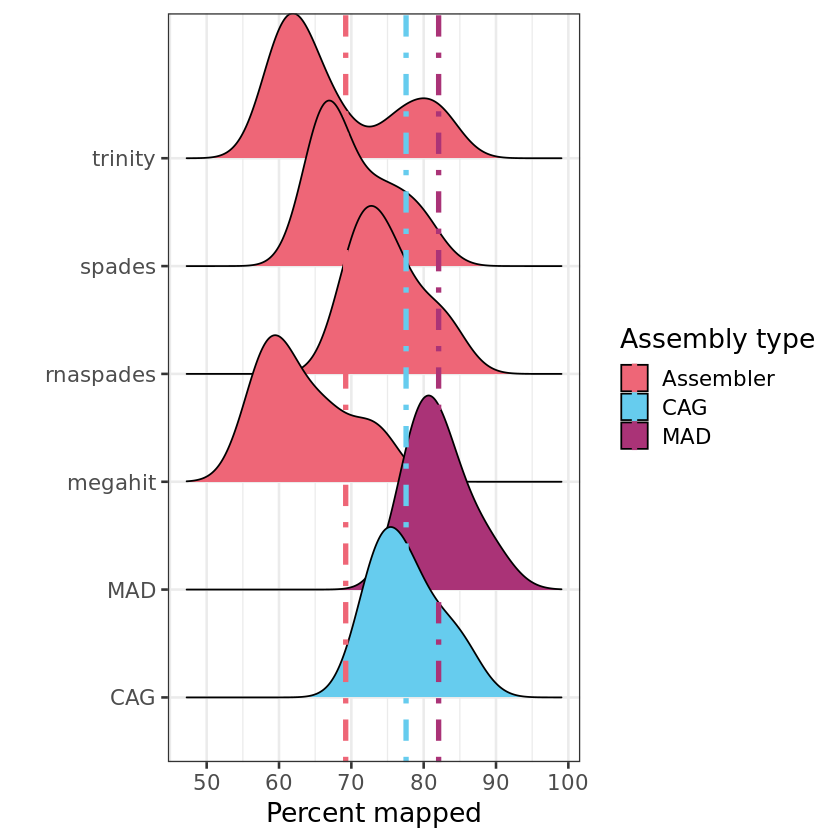

In [8]:
for_ridgeplot =percent_mapped_mad_nb %>% dplyr::mutate(FillCol="MAD")%>% dplyr::bind_rows(percent_mapped_byassembler_nb %>% 
                                                  dplyr::mutate(FillCol="Assembler")) %>%
    dplyr::bind_rows(percent_mapped_cag_nb %>% dplyr::mutate(FillCol="CAG"))

for_ridgeplot_means = for_ridgeplot %>% dplyr::group_by(FillCol) %>% 
    dplyr::summarize(meanPercMapped=mean(PercentMapped))
ridge_assemblers_nb = ggplot(for_ridgeplot) + 
    geom_density_ridges(aes(x = PercentMapped, y = Assemblers, fill = FillCol)) + 
    geom_vline(data=for_ridgeplot_means, aes(xintercept=meanPercMapped,col=FillCol),
               linetype="dotdash",size=1.5)+
    theme_bw(base_size=16)+ ylab("") + xlab("Percent mapped") +
    scale_fill_manual(name="Assembly type", values=c("#EE6677",'#66CCEE', 
                                                     '#AA3377', '#BBBBBB', "black"))  +
    scale_color_manual(name="Assembly type", values=c("#EE6677",'#66CCEE', 
                                                     '#AA3377', '#BBBBBB', "black")) 
ridge_assemblers_nb


In [9]:
percent_mapped_mad_nb %>% dplyr::mutate(FillCol="MAD")%>% dplyr::bind_rows(percent_mapped_byassembler_nb %>% 
                                                  dplyr::mutate(FillCol="Assembler")) %>%
    dplyr::bind_rows(percent_mapped_cag_nb %>% dplyr::mutate(FillCol="CAG")) %>%
    dplyr::group_by(Assemblers) %>%
    dplyr::summarize(MeanPercMapped = mean(PercentMapped),
                     StdPercMapped = sd(PercentMapped))

Assemblers,MeanPercMapped,StdPercMapped
<chr>,<dbl>,<dbl>
CAG,77.56528,4.489038
MAD,82.06747,3.759396
megahit,63.50640,6.146361
rnaspades,75.03955,4.708261
spades,70.51115,5.356793
trinity,67.82171,8.645089


In [10]:
diatoms_EUKulele_full= EUKulele_frame_full %>% dplyr::mutate(Genus = case_when(trimws(Genus) == "Skeletonema" ~ "Skeletonema",
                                                 trimws(Genus) == "Thalassiosira" ~ "Thalassiosira",
                                                 trimws(Class) == "Bacillariophyta" ~ "Other Coscinodiscophyceae",
                                                 trimws(Class) == "Unclassified" ~ "Unannotated",
                                                 trimws(Class) == "Unknown" ~ "Unannotated at Class level",
                                                 TRUE ~ "Other")) %>%
    dplyr::group_by(Sample,Assembler,Genus) %>% dplyr::summarize(summedReads = sum(NumReads))

`summarise()` has
grouped output by
'Sample',
'Assembler'. You
can override using
the `.groups`
argument.


`summarise()` has
grouped output by
'Assembler'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Assembler',
'Sample'. You can
override using the
`.groups` argument.
Joining, by =
c("Assembler",
"Sample")


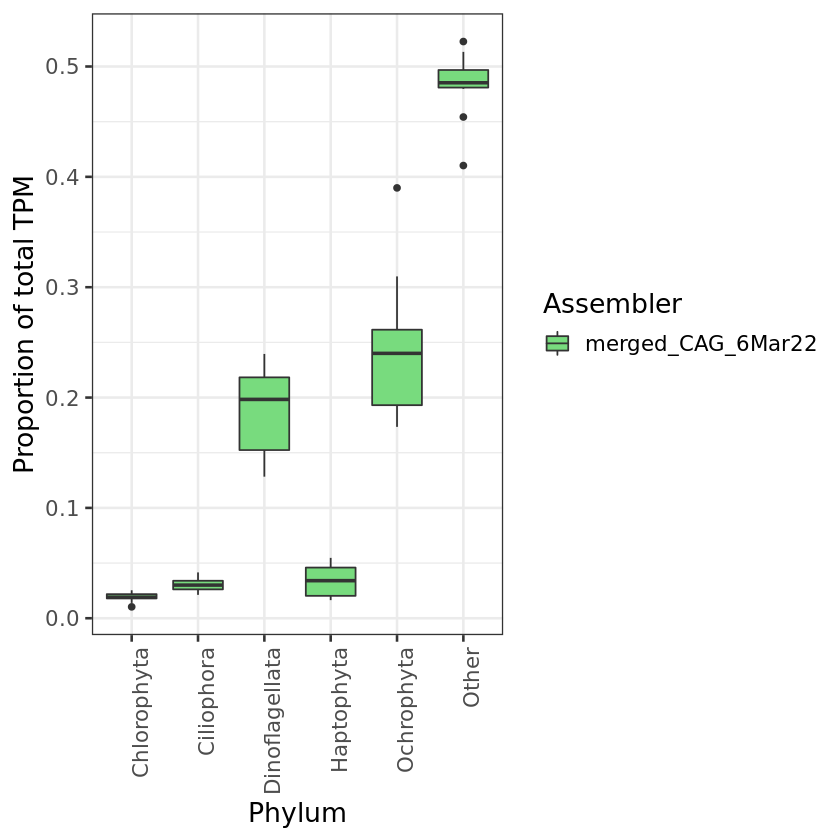

In [12]:
distinct_cols <- c("#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c",
                   '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')

EUKulele_frame_check_sum = EUKulele_frame_check %>% dplyr::group_by(Assembler,Sample) %>%
    dplyr::summarize(sumTPMall = sum(TPMsum))
boxplot_fract_nb = ggplot(EUKulele_frame_check %>% dplyr::group_by(Assembler,Sample,Phylum) %>%
       dplyr::summarize(TPMsum=sum(TPMsum)) %>% dplyr::left_join(EUKulele_frame_check_sum)) + 
    geom_boxplot(aes(x=Phylum,y=TPMsum/sumTPMall,fill=Assembler,group=paste0(Assembler,Phylum))) + 
    #scale_y_log10() + 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) + 
    scale_fill_manual(values=distinct_cols) + ylab("Proportion of total TPM")
boxplot_fract_nb

In [13]:
head(ko_split_by_assembler %>% dplyr::group_by(Source,var1,AssemblerSource) %>%
    dplyr::summarize(ListAssemblers = list(unique(trimws(AssemblerSource)))) %>%
    dplyr::filter(var1!="-") %>%
    dplyr::group_by(ListAssemblers,Source) %>%
    dplyr::tally())

Warning message:
“Removed 27143 rows containing missing values (geom_point).”
Warning message:
“Removed 23700 rows containing missing values (geom_point).”
Warning message:
“Removed 22177 rows containing missing values (geom_point).”


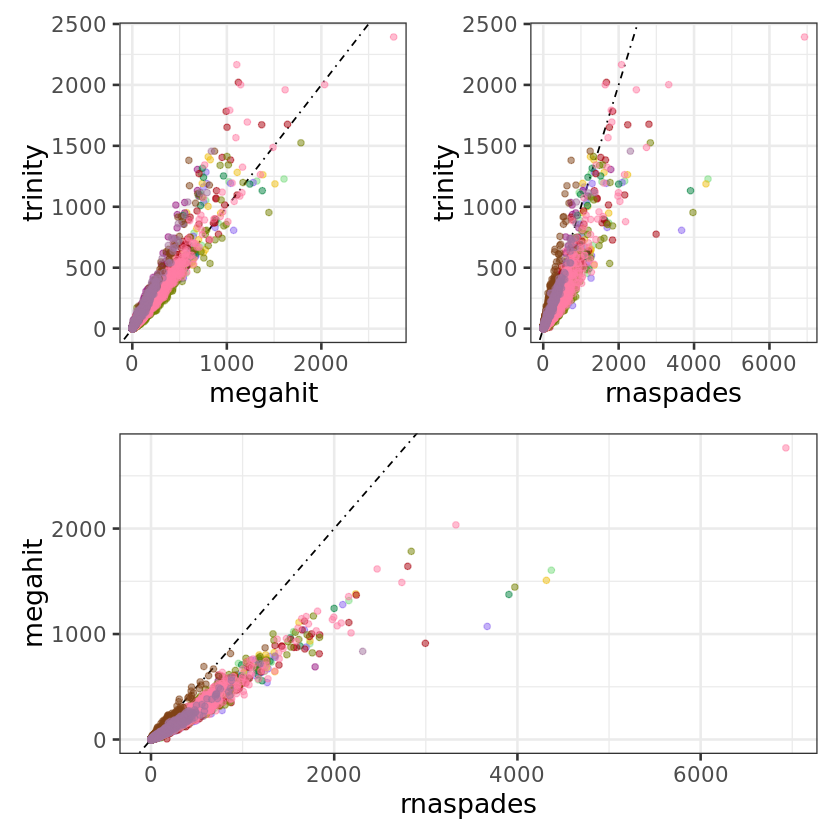

In [14]:
distinct_cols <- c("#78db7e","#8965ef","#f0c017",
                                                  "#961480","#01813e","#aa000d",
                                                  "#758000","#ff7ca4","#804216",
                                                  "#a2729c",
                   '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')

split_assembler = ko_split_by_assembler %>% dplyr::group_by(Source,var1,AssemblerSource) %>%
     dplyr::tally() %>% dplyr::ungroup() %>%
     dplyr::filter(var1 != "-") %>%
     tidyr::pivot_wider(id_cols=c("var1","Source"),
                        names_from="AssemblerSource",
                        values_from="n")

trinity_megahit = ggplot(split_assembler) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash") +
    geom_point(aes(x=megahit,y=trinity,color=Source),alpha=0.5) + 
    theme_bw(base_size=16) + theme(legend.position="none") + 
    scale_color_manual(values=distinct_cols)

trinity_rnaspades = ggplot(split_assembler) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash") +
    geom_point(aes(x=rnaspades,y=trinity,color=Source),alpha=0.5) + 
    theme_bw(base_size=16) + theme(legend.position="none") + 
    scale_color_manual(values=distinct_cols)

megahit_rnaspades = ggplot(split_assembler) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash") +
    geom_point(aes(x=rnaspades,y=megahit,color=Source),alpha=0.5) + 
    theme_bw(base_size=16) + theme(legend.position="none") + 
    scale_color_manual(values=distinct_cols)

spades_rnaspades = ggplot(split_assembler) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash") +
    geom_point(aes(x=spades,y=megahit,color=Source),alpha=0.5) + 
    theme_bw(base_size=16) + theme(legend.position="none") + 
    scale_color_manual(values=distinct_cols)


(trinity_megahit + trinity_rnaspades) / megahit_rnaspades

In [15]:
ko_split_grouped = ko_split_by_assembler %>% dplyr::group_by(Source,var1) %>%
    dplyr::summarize(ListAssemblers = list(sort(unique(trimws(AssemblerSource))))) %>%
    dplyr::filter(var1!="-") %>%
    dplyr::group_by(ListAssemblers,Source) %>%
    dplyr::tally()%>%
    dplyr::ungroup() %>%
    dplyr::group_by(ListAssemblers)%>%
    dplyr::summarize(meanKOs = mean(n,na.rm=T),
                     stdKOs = sd(n,na.rm=T))

ko_upset_plot = ggplot(ko_split_grouped, aes(x = ListAssemblers, y = meanKOs)) +
    geom_bar(color="black", fill = "#EE6677", stat="identity", position = position_dodge(width=0.9)) +
    scale_x_upset(order="degree") +
    geom_errorbar(aes(x = ListAssemblers, ymax = meanKOs+stdKOs, ymin = meanKOs-stdKOs)) + 
    #scale_x_mergelist(sep = "-") +
    theme_bw(base_size = 16) +
    ylab("Mean number of distinct KOs") + xlab("") #+ 
    #ggtitle("Clustering within eukrhythmic")

`summarise()` has
grouped output by
'Source'. You can
override using the
`.groups` argument.


In [16]:
ko_occurrences = ggplot(split_assembler, aes(x=trinity, y=megahit)) +
  geom_point(aes(fill = rnaspades,size=rnaspades),pch=21,stroke=0.5,alpha=0.5) +
  geom_abline(aes(intercept=0,slope=1),linetype="dotdash") +
  scale_fill_gradient(low="light blue", high="maroon",name="rnaSPAdes") + 
  scale_size(name="rnaSPAdes") + theme_bw(base_size=16) + ylab("KO occurrence in MEGAHIT assembly") + 
  xlab("KO occurrence in Trinity assembly") #+ 
  #ggtitle("Number of occurrences of each KO, sample-separated")

`summarise()` has
grouped output by
'Assembler'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Assembler',
'Sample'. You can
override using the
`.groups` argument.
Joining, by =
c("Assembler",
"Sample")


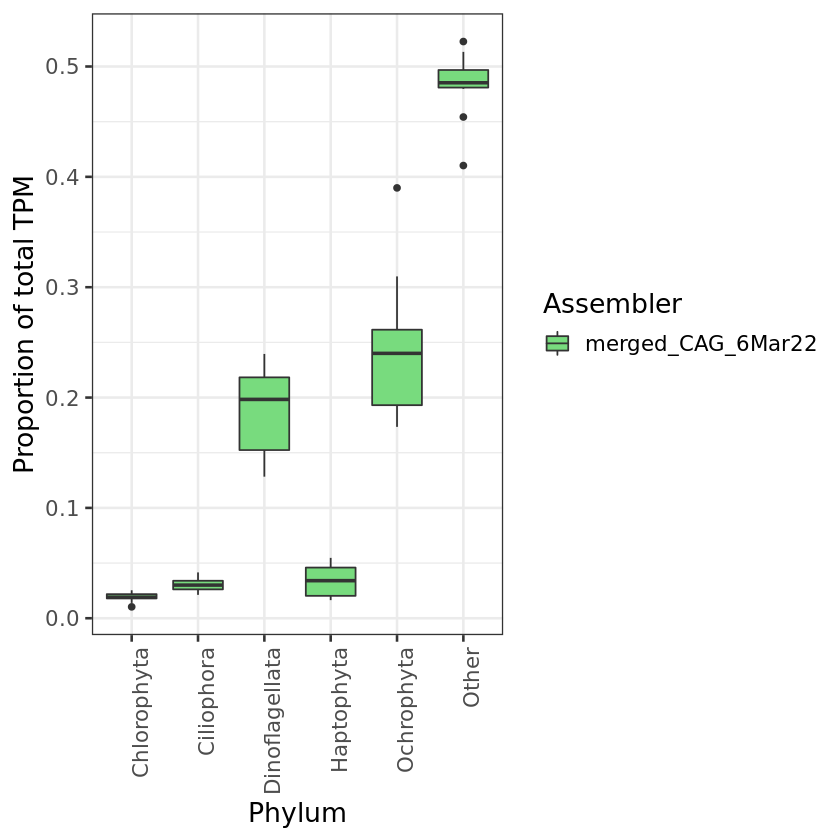

In [17]:
EUKulele_frame_check_sum = EUKulele_frame_check %>% dplyr::group_by(Assembler,Sample) %>%
    dplyr::summarize(sumTPMall = sum(TPMsum))
boxplot_fract_nb = ggplot(EUKulele_frame_check %>% dplyr::group_by(Assembler,Sample,Phylum) %>%
       dplyr::summarize(TPMsum=sum(TPMsum)) %>% dplyr::left_join(EUKulele_frame_check_sum)) + 
    geom_boxplot(aes(x=Phylum,y=TPMsum/sumTPMall,fill=Assembler,group=paste0(Assembler,Phylum))) + 
    #scale_y_log10() + 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) + 
    scale_fill_manual(values=distinct_cols) + ylab("Proportion of total TPM")
boxplot_fract_nb

In [ ]:
((ridge_assemblers_nb / boxplot_fract_nb) | (ko_upset_plot / ko_occurrences )) +
  plot_layout(guides = 'collect') & plot_annotation(tag_levels = 'A')
#ggsave(file.path("..","figures","07Fig-Narragansett_Bay_Fig.png"),dpi=400,width=13,height=13,units="in")

In [18]:
phylum_merged_diatom=data.frame(fread(file.path("..","data-output","phylum_merged_diatom.csv")))
order_merged_diatom=data.frame(fread(file.path("..","data-output","order_merged_diatom.csv")))
harriet_grouped_out=data.frame(fread(file.path("..","data-output","harriet_grouped_out.csv")))
eukulele_grouped_out=data.frame(fread(file.path("..","data-output","eukulele_grouped_out.csv")))
harriet_diatom_out=data.frame(fread(file.path("..","data-output","diatom_sum_HA.csv")))
harriet_nb=data.frame(fread("../data-output/harriet_nb.csv"))
harriet_nb_grouped=data.frame(fread("../data-output/harriet_nb_grouped.csv"))

`geom_smooth()` using formula 'y ~ x'



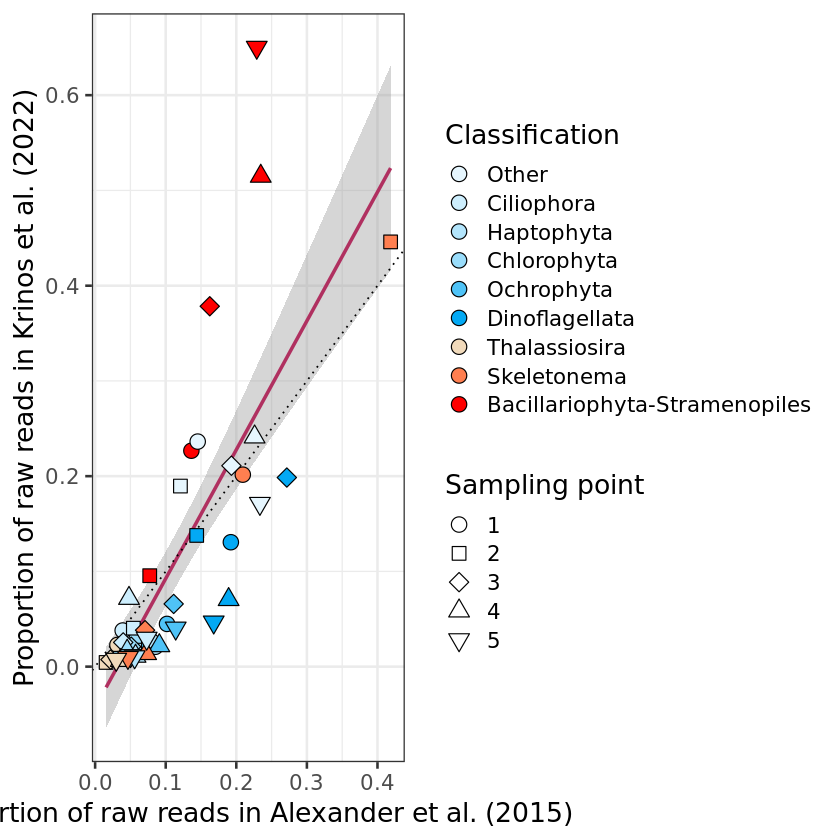

In [19]:
for_plotting_prop_reads = harriet_grouped_out %>%
    dplyr::rename(c("TotalHarriet"="total",
                  "SampleSumHarriet"="value",
                   "ProportionHarriet"="Proportion"))  %>% 
     dplyr::left_join(eukulele_grouped_out %>%
                                              dplyr::rename(c("TotalEUKulele"="total",
                                                              "SampleSumEUKulele"="NumReadssum",
                   "ProportionEUKulele"="Proportion")),
                                              by=c("numerictime","ClassificationPlotRed"))

tax_classes=c("Other",
                                                     "Ciliophora","Haptophyta",
                                                    "Chlorophyta","Ochrophyta",
                                                    "Dinoflagellata","Thalassiosira","Skeletonema",
                                                    "Bacillariophyta-Stramenopiles","Bacteria","Archaea")
color_tax=c("#e6f6fe","#cdeefd","#b3e5fc","#9addfb",
                                         "#4fc3f7","#03a9f4","#F1DABB","#FF7F50","red","orange","black")

compare_scatter_alexander = ggplot(for_plotting_prop_reads) + 
    geom_smooth(aes(x = ProportionHarriet,y=ProportionEUKulele),method="lm",color="maroon") + 
    geom_abline(aes(slope=1,intercept=0),linetype="dotted") + 
    geom_point(aes(x = ProportionHarriet, y =ProportionEUKulele, fill = ClassificationPlotRed,
                   shape=factor(numerictime)),
               size=4) + 
    scale_shape_manual(values=c(21,22,23,24,25),name="Sampling point") + 
    scale_fill_manual(values=color_tax,breaks=tax_classes,
                      name="Classification") + theme_bw(base_size=16) + 
    guides(fill = guide_legend(override.aes = list(pch=21) ) )+
    xlab("Proportion of raw reads in Alexander et al. (2015)")+ 
    ylab("Proportion of raw reads in Krinos et al. (2022)")
compare_scatter_alexander

`geom_smooth()` using formula 'y ~ x'



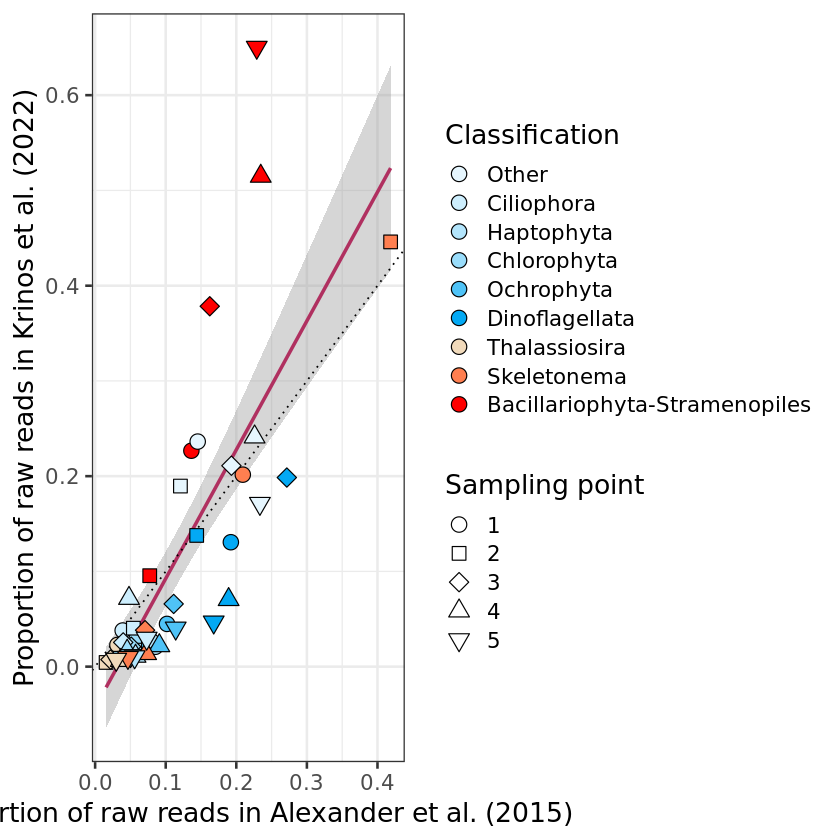

In [153]:
for_plotting_prop_reads = harriet_grouped_out %>%
    dplyr::rename(c("TotalHarriet"="total",
                  "SampleSumHarriet"="value",
                   "ProportionHarriet"="Proportion"))  %>% 
     dplyr::left_join(eukulele_grouped_out %>%
                                              dplyr::rename(c("TotalEUKulele"="total",
                                                              "SampleSumEUKulele"="NumReadssum",
                   "ProportionEUKulele"="Proportion")),
                                              by=c("numerictime","ClassificationPlotRed"))

tax_classes=c("Other",
                                                     "Ciliophora","Haptophyta",
                                                    "Chlorophyta","Ochrophyta",
                                                    "Dinoflagellata","Thalassiosira","Skeletonema",
                                                    "Bacillariophyta-Stramenopiles","Bacteria","Archaea")
color_tax=c("#e6f6fe","#cdeefd","#b3e5fc","#9addfb",
                                         "#4fc3f7","#03a9f4","#F1DABB","#FF7F50","red","orange","black")

compare_scatter_alexander = ggplot(for_plotting_prop_reads) + 
    geom_smooth(aes(x = ProportionHarriet,y=ProportionEUKulele),method="lm",color="maroon") + 
    geom_abline(aes(slope=1,intercept=0),linetype="dotted") + 
    geom_point(aes(x = ProportionHarriet, y =ProportionEUKulele, fill = ClassificationPlotRed,
                   shape=factor(numerictime)),
               size=4) + 
    scale_shape_manual(values=c(21,22,23,24,25),name="Sampling point") + 
    scale_fill_manual(values=color_tax,breaks=tax_classes,
                      name="Classification") + theme_bw(base_size=16) + 
    guides(fill = guide_legend(override.aes = list(pch=21) ) )+
    xlab("Proportion of raw reads in Alexander et al. (2015)")+ 
    ylab("Proportion of raw reads in Krinos et al. (2022)")
compare_scatter_alexander

In [24]:
per_sample_reads = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_species = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Species,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Species = dplyr::case_when(Reads < 150000 ~ "Other",
                                                 TRUE ~ Species)) %>%
    dplyr::group_by(Species,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))
ochro_families = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Family,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 150000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

`summarise()` has
grouped output by
'Species'. You can
override using the
`.groups` argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Species',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups` argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.


`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Genus'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Genus',
'TotalReads'. You
can override using
the `.groups`
argument.


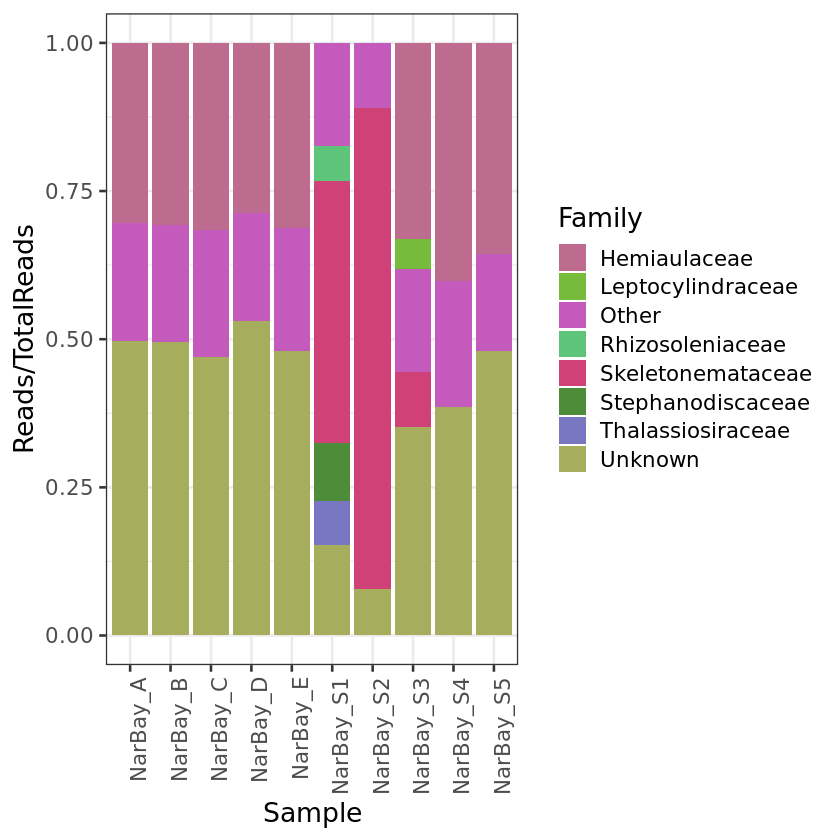

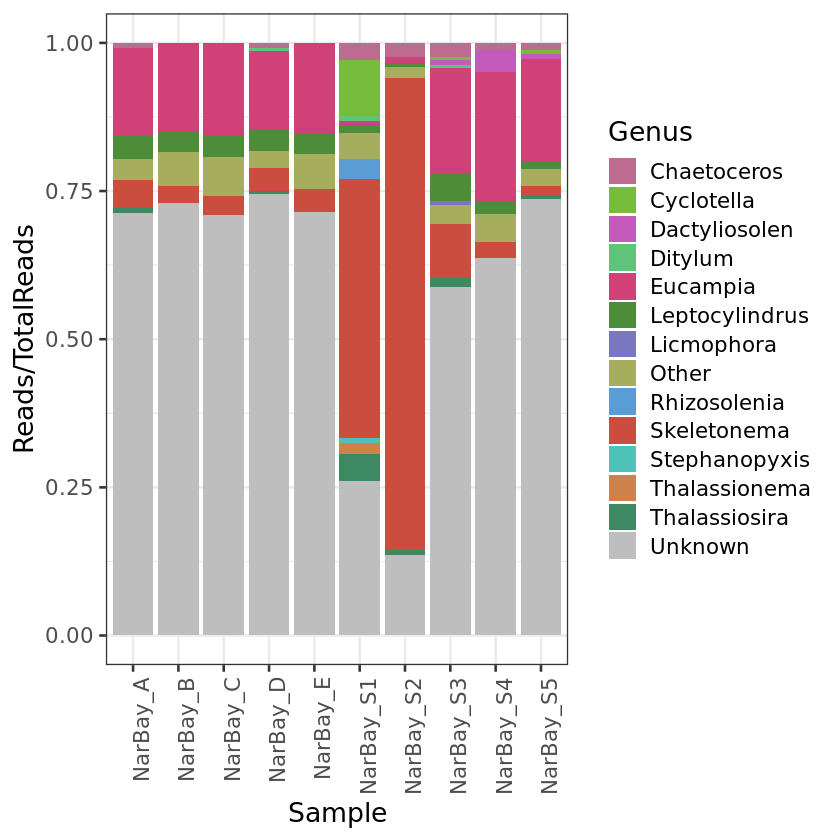

In [42]:


per_sample_reads = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_families = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Family,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 1500000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))
ggplot(ochro_families) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Family),stat="identity") + 
    scale_fill_manual(values=distinct_cols)+ 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

ochro_genus = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Genus,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Genus = dplyr::case_when(Reads < 150000 ~ "Other",
                                                 TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))
ggplot(ochro_genus) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Genus),stat="identity") + 
    scale_fill_manual(values=distinct_cols)+ 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

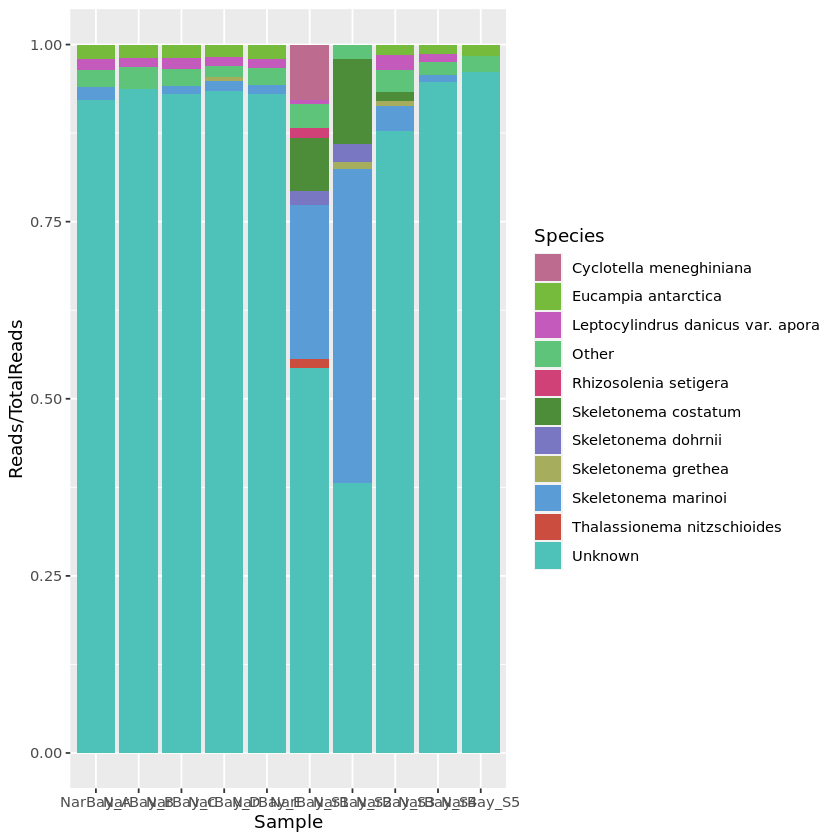

In [14]:
distinct_cols=c("#bd6c90",
"#77bb3c",
"#c35abc",
"#5dc47a",
"#d04177",
"#4d8c38",
"#7977c2",
"#a6ad5d",
"#5a9dd6",
"#ca4d3f",
"#4ec2b9",
"#ce814a",
"#3c8963",
"#786d29","black")
ggplot(ochro_species) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Species),stat="identity") + 
    scale_fill_manual(values=distinct_cols)+ 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

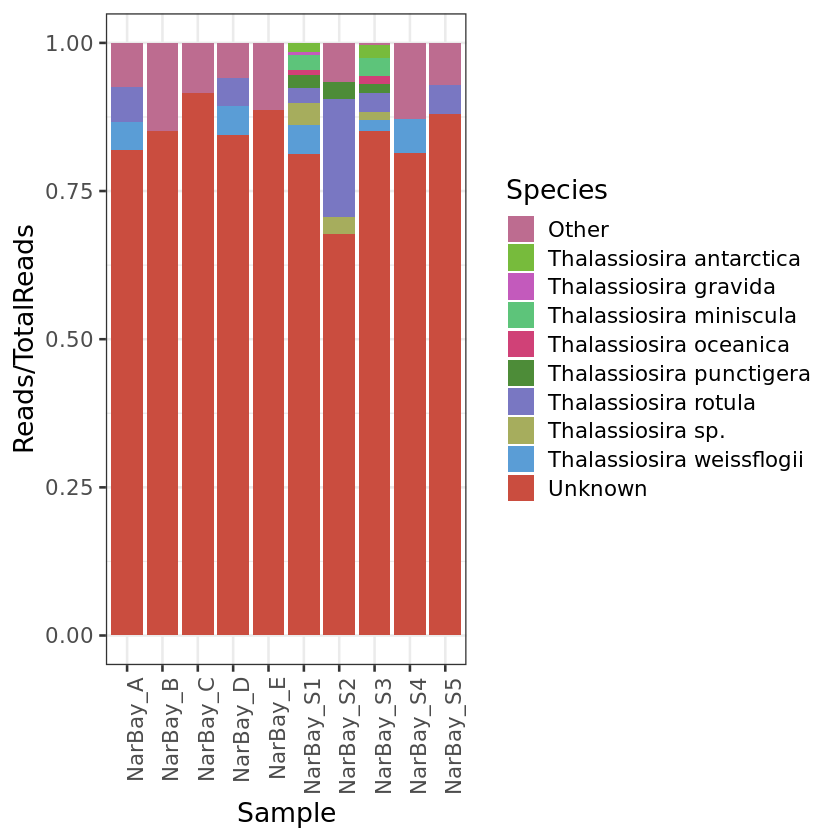

In [26]:
distinct_cols=c("#bd6c90",
"#77bb3c",
"#c35abc",
"#5dc47a",
"#d04177",
"#4d8c38",
"#7977c2",
"#a6ad5d",
"#5a9dd6",
"#ca4d3f",
"#4ec2b9",
"#ce814a",
"#3c8963",
"#786d29","black")
ggplot(ochro_species) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Species),stat="identity") + 
    scale_fill_manual(values=distinct_cols)+ 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

`summarise()` has
grouped output by
'Species'. You can
override using the
`.groups` argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Species',
'TotalReads'. You
can override using
the `.groups`
argument.


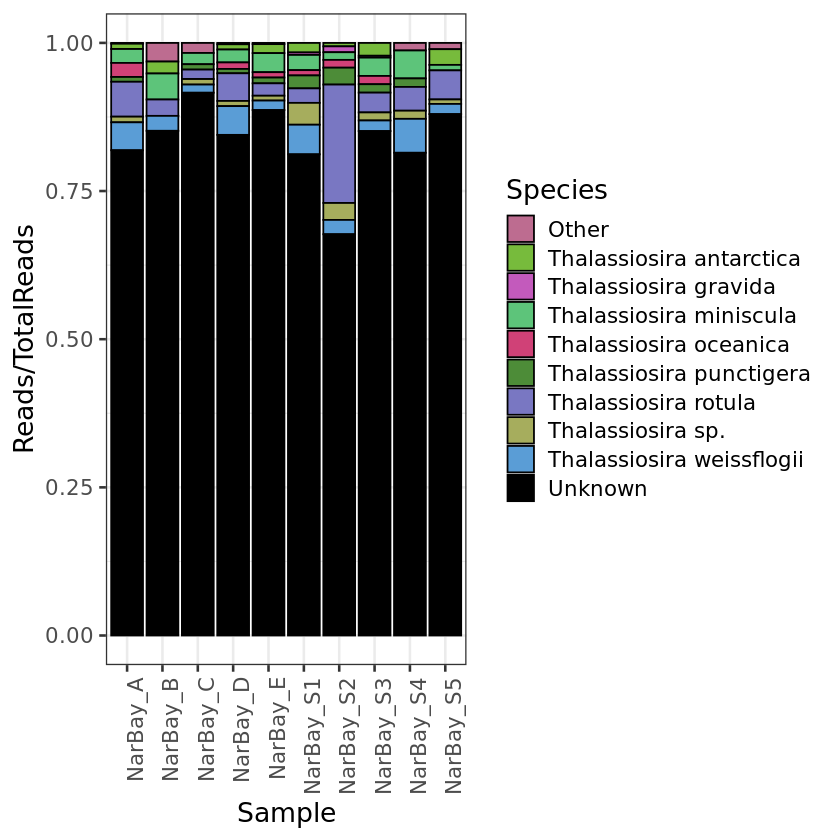

In [27]:


per_sample_reads = EUKulele_all %>% dplyr::filter(Genus == "Thalassiosira") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_species = EUKulele_all %>% dplyr::filter(Genus == "Thalassiosira") %>%
        dplyr::group_by(Species,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Species = dplyr::case_when(Reads < 1000 ~ "Other",
                                                 TRUE ~ Species)) %>%
    dplyr::group_by(Species,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

distinct_cols=c("#bd6c90",
"#77bb3c",
"#c35abc",
"#5dc47a",
"#d04177",
"#4d8c38",
"#7977c2",
"#a6ad5d",
"#5a9dd6",
"black",
"#ca4d3f",
"#4ec2b9",
"#ce814a",
"#3c8963",
"#786d29","black")
ggplot(ochro_species) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Species),stat="identity",color="black") + 
    scale_fill_manual(values=distinct_cols)+ 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

`summarise()` has
grouped output by
'Species'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Species',
'TotalReads'. You
can override using
the `.groups`
argument.


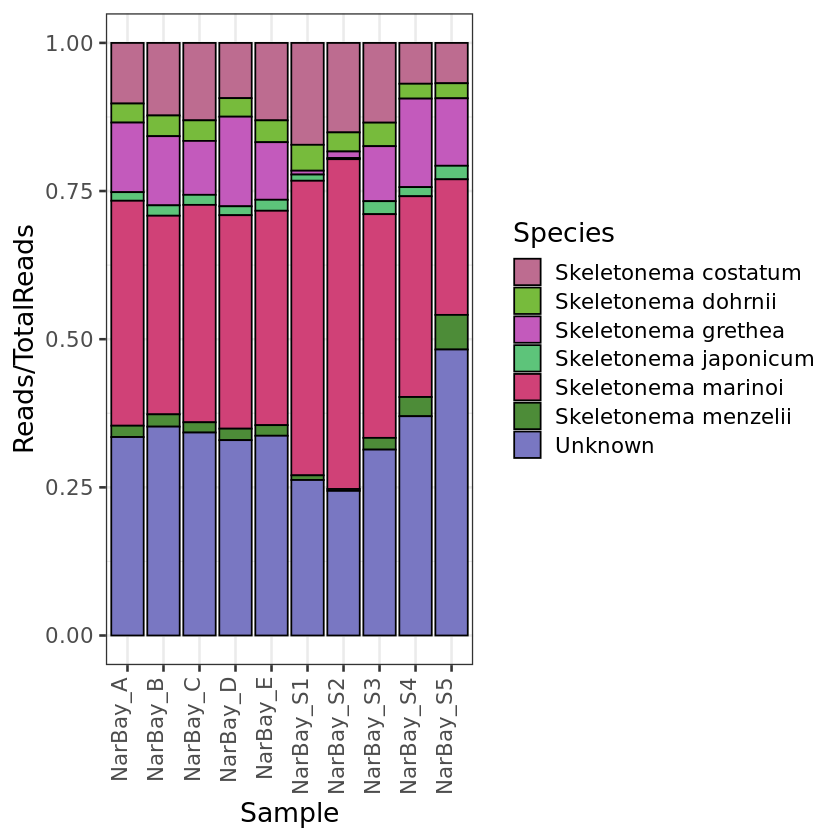

In [115]:


per_sample_reads = EUKulele_all %>% dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_species = EUKulele_all %>% dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(Species,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Species = dplyr::case_when(Reads < 1000 ~ "Other",
                                                 TRUE ~ Species)) %>%
    dplyr::group_by(Species,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

distinct_cols=c("#bd6c90",
"#77bb3c",
"#c35abc",
"#5dc47a",
"#d04177",
"#4d8c38",
"#7977c2",
"#a6ad5d",
"#5a9dd6",
"black",
"#ca4d3f",
"#4ec2b9",
"#ce814a",
"#3c8963",
"#786d29","black")
ggplot(ochro_species) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Species),stat="identity",color="black") + 
    scale_fill_manual(values=distinct_cols)+ 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust =0, hjust=1))

`summarise()` has
grouped output by
'Species'. You can
override using the
`.groups`
argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Species',
'TotalReads'. You
can override using
the `.groups`
argument.


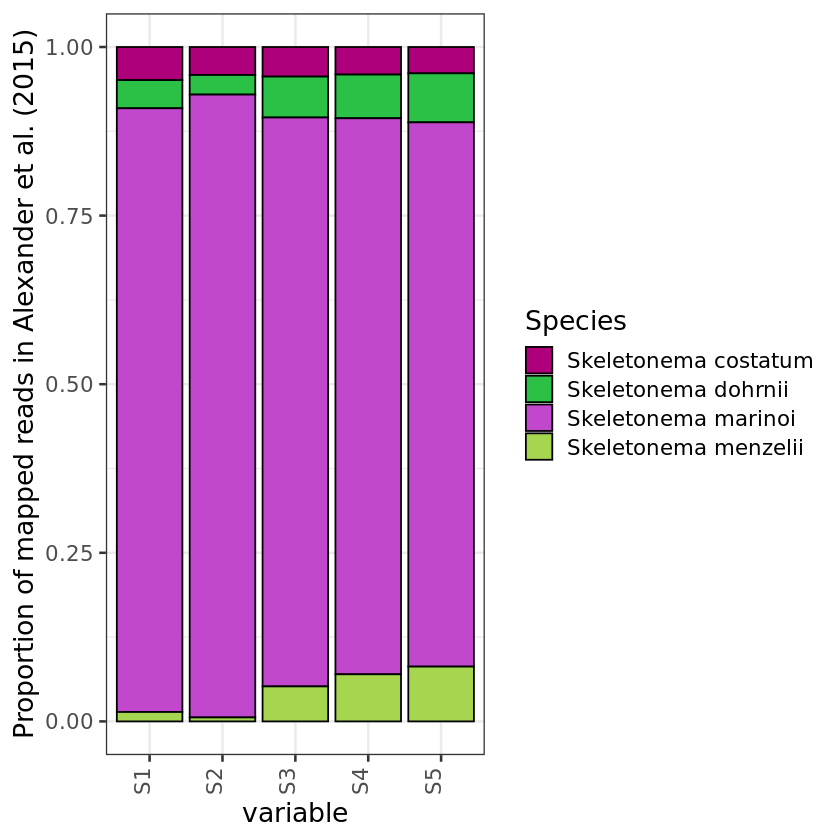

In [139]:
per_sample_reads = harriet_nb_grouped %>%
        dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(variable) %>% dplyr::summarize(TotalReads=sum(value))

distinct_cols=c("#ad007a",
"#2ac146",
"#c148cd",
"#a6d54f",
"#9962ec",
"#d0c100",
"#8587ff",
"#fdba49",
"#4eaeff",
"#bc1308",
"#02d38a",
"#f1107a",
"#8ed974",
"#ff609a",
"#006b2b",
"#ff6434",
"#01a5cf",
"#c57200",
"#0170a1",
"#c9cc63",
"#28548a",
"#525d00",
"#ff89ba",
"#019e80",
"#a0154e",
"#bb8a66",
"#8b392a",
"#ff9e9e","black","white")
all_species = unique(c((harriet_nb_grouped %>% dplyr::filter(Genus == "Skeletonema"))$Species,
                        (EUKulele_all %>% dplyr::filter(Genus == "Skeletonema"))$Species))
harriet_species_diatom = ggplot(harriet_nb_grouped %>%
        dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(Species,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Species = dplyr::case_when(Reads < 0 ~ "Other",
                                                 TRUE ~ Species)) %>%
    dplyr::group_by(Species,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads))) + 
    geom_bar(aes(x=variable,y=Reads/TotalReads,fill=Species),stat="identity",color="black") + 
    scale_fill_manual(values=c(distinct_cols),breaks=all_species) + 
    theme_bw(base_size=16)+ ylab("Proportion of mapped reads in Alexander et al. (2015)") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0, hjust=1)) 
harriet_species_diatom

In [186]:
skeletonema_harriet = harriet_nb_grouped %>%
        dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(Species,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(harriet_nb_grouped %>%
        dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(variable) %>% dplyr::summarize(TotalReads=sum(value))) %>%
        dplyr::mutate(Species = dplyr::case_when(Reads < 0 ~ "Other",
                                                 TRUE ~ Species)) %>%
    dplyr::group_by(Species,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads))
skeletonema_eukulele = EUKulele_all %>% dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(Species,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(EUKulele_all %>% dplyr::filter(Genus == "Skeletonema") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))) %>%
        dplyr::mutate(Species = dplyr::case_when(Reads < 1000 ~ "Other",
                                                 TRUE ~ Species)) %>%
    dplyr::group_by(Species,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))
both_skel = skeletonema_harriet %>% dplyr::mutate(Sample=paste0("NarBay_",variable)) %>%
                dplyr::rename(c("AlexanderReads"="Reads","TotalAlexanderReads"="TotalReads")) %>% 
                dplyr::full_join(skeletonema_eukulele%>%
                dplyr::rename(c("EUKuleleReads"="Reads","TotalEUKuleleReads"="TotalReads"))) %>%
    dplyr::filter(grepl("S",Sample))%>% dplyr::mutate(AlexanderReads = as.numeric(AlexanderReads)) %>%
    dplyr::mutate(AlexanderReads = dplyr::case_when(is.na(AlexanderReads) ~ 0,
                                                    TRUE ~ AlexanderReads))%>% 
    dplyr::mutate(TotalAlexanderReads = as.numeric(TotalAlexanderReads)) %>%
    dplyr::mutate(TotalAlexanderReads = dplyr::case_when(is.na(TotalAlexanderReads) ~ 1,
                                                    TRUE ~ TotalAlexanderReads))

`summarise()` has
grouped output by
'Species'. You can
override using the
`.groups`
argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Species',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Species'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Species',
'TotalReads'. You
can override using
the `.groups`
argument.
Joining, by =
c("Species",
"Sample")


In [187]:
both_skel

Species,TotalAlexanderReads,variable,AlexanderReads,Sample,TotalEUKuleleReads,EUKuleleReads
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Skeletonema costatum,7648868,S5,298418,NarBay_S5,446341.6,30393.16
Skeletonema costatum,9746051,S4,398081,NarBay_S4,503006.6,34658.30
Skeletonema costatum,21414265,S3,939540,NarBay_S3,2788737.3,375264.64
Skeletonema costatum,67287662,S1,3302989,NarBay_S1,12164131.1,2091612.47
Skeletonema costatum,118591786,S2,4918526,NarBay_S2,19179966.7,2896393.30
Skeletonema dohrnii,7648868,S5,556146,NarBay_S5,446341.6,11340.76
Skeletonema dohrnii,9746051,S4,632042,NarBay_S4,503006.6,12621.25
Skeletonema dohrnii,21414265,S3,1299318,NarBay_S3,2788737.3,110751.10
Skeletonema dohrnii,67287662,S1,2811816,NarBay_S1,12164131.1,531433.93


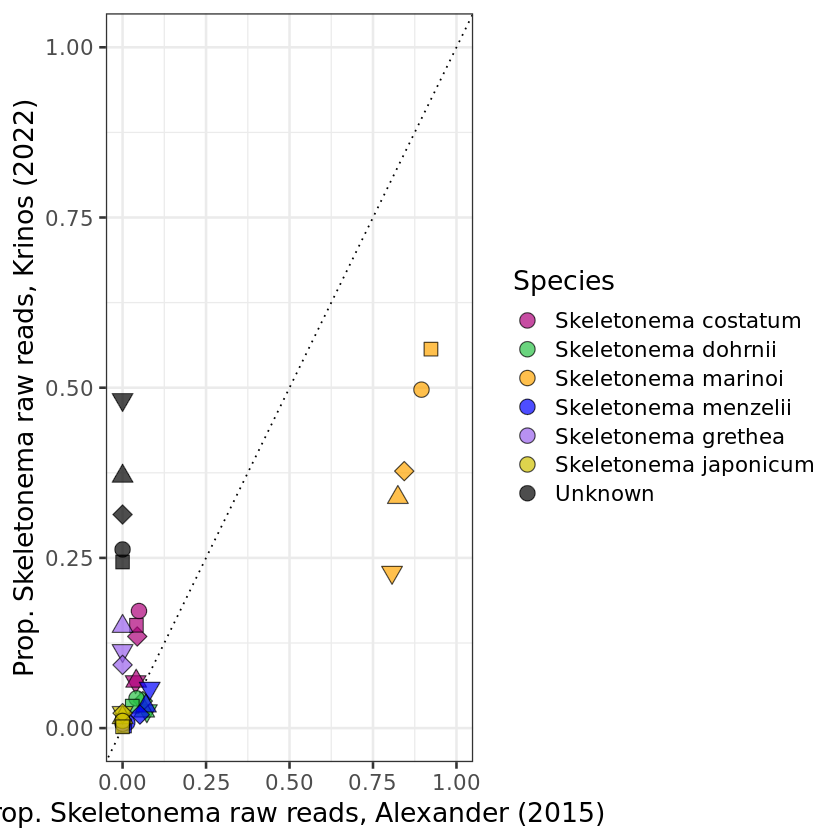

In [193]:
distinct_cols=c("#ad007a",
"#2ac146",
"orange",
"blue",
"#9962ec",
"#d0c100",
"black")
all_species = unique(c((harriet_nb_grouped %>% dplyr::filter(Genus == "Skeletonema"))$Species,
                        (EUKulele_all %>% dplyr::filter(Genus == "Skeletonema"))$Species))

skeletonema_compare = ggplot(both_skel) + geom_abline(aes(intercept=0,slope=1),linetype="dotted") +
    geom_point(aes(x=AlexanderReads/TotalAlexanderReads,
                   y=EUKuleleReads/TotalEUKuleleReads,shape=Sample,fill=Species),size=4,alpha=0.7) + 
    scale_shape_manual(values=c(21,22,23,24,25)) + theme_bw(base_size=16) +
    guides(fill = guide_legend(override.aes = list(pch=21))) + scale_fill_manual(values=distinct_cols,
                                                                                 breaks=all_species) + 
    ylab("Prop. Skeletonema raw reads, Krinos (2022)")+ 
    xlab("Prop. Skeletonema raw reads, Alexander (2015)")+guides(shape = "none") + xlim(c(0,1)) + ylim(c(0,1))
skeletonema_compare

`summarise()` has grouped output by 'Genus'. You can
override using the `.groups` argument.
Joining, by = "Sample"
`summarise()` has grouped output by 'Genus', 'TotalReads'.
You can override using the `.groups` argument.
`summarise()` has grouped output by 'Genus'. You can
override using the `.groups` argument.
Joining, by = "Sample"
`summarise()` has grouped output by 'Genus', 'TotalReads'.
You can override using the `.groups` argument.


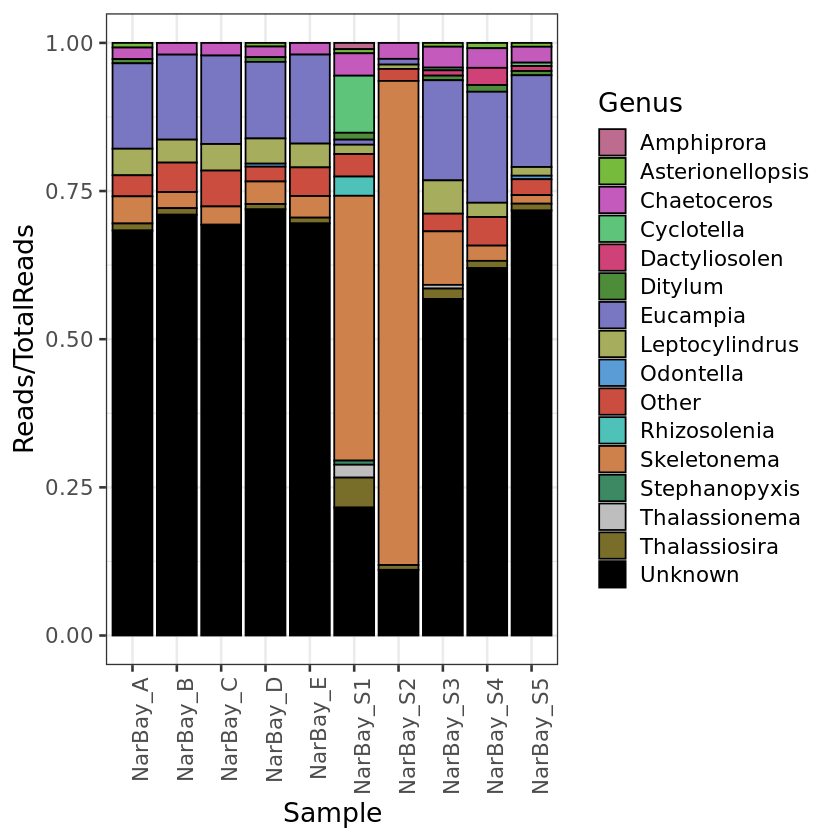

In [98]:
per_sample_reads = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_species = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Genus,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        #dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
        #                                         TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

distinct_cols=c("#bd6c90",
"#77bb3c",
"#c35abc",
"#5dc47a",
"#d04177",
"#4d8c38",
"#7977c2",
"#a6ad5d",
"#5a9dd6",
"#ca4d3f",
"#4ec2b9",
"#ce814a",
"#3c8963","gray",
"#786d29","black")
ggplot(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Genus,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
                                                 TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Genus),stat="identity",color="black") + 
    scale_fill_manual(values=distinct_cols) + 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

`summarise()` has
grouped output by
'Genus'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Genus',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.


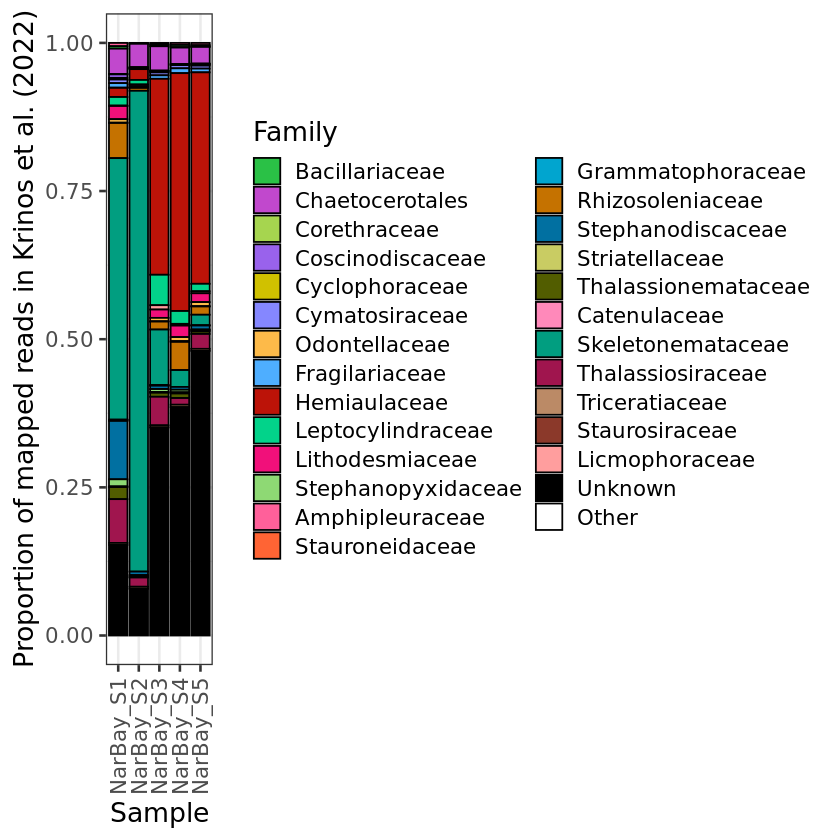

In [204]:
per_sample_reads = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_species = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Genus,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        #dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
        #                                         TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

distinct_cols=c("#ad007a",
"#2ac146",
"#c148cd",
"#a6d54f",
"#9962ec",
"#d0c100",
"#8587ff",
"#fdba49",
"#4eaeff",
"#bc1308",
"#02d38a",
"#f1107a",
"#8ed974",
"#ff609a",
"#006b2b",
"#ff6434",
"#01a5cf",
"#c57200",
"#0170a1",
"#c9cc63",
"#28548a",
"#525d00",
"#ff89ba",
"#019e80",
"#a0154e",
"#bb8a66",
"#8b392a",
"#ff9e9e","black","white")
all_families = unique(c((harriet_nb_grouped %>% dplyr::filter(Class == "Bacillariophyta"))$Family,
                        (EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta"))$Family))
all_families = c(setdiff(all_families,c("Unknown")),"Unknown","Other")
EUKulele_families_diatom = ggplot(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::filter(grepl("S",Sample)) %>%
        dplyr::group_by(Family,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 10000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Family),stat="identity",color="black") + 
    scale_fill_manual(values=distinct_cols,breaks=all_families) + 
    theme_bw(base_size=16)+ ylab("Proportion of mapped reads in Krinos et al. (2022)") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
EUKulele_families_diatom

`summarise()` has grouped output by 'Genus'. You can
override using the `.groups` argument.
Joining, by = "Sample"
`summarise()` has grouped output by 'Genus', 'TotalReads'.
You can override using the `.groups` argument.
`summarise()` has grouped output by 'Family'. You can
override using the `.groups` argument.
Joining, by = "Sample"
`summarise()` has grouped output by 'Family', 'TotalReads'.
You can override using the `.groups` argument.


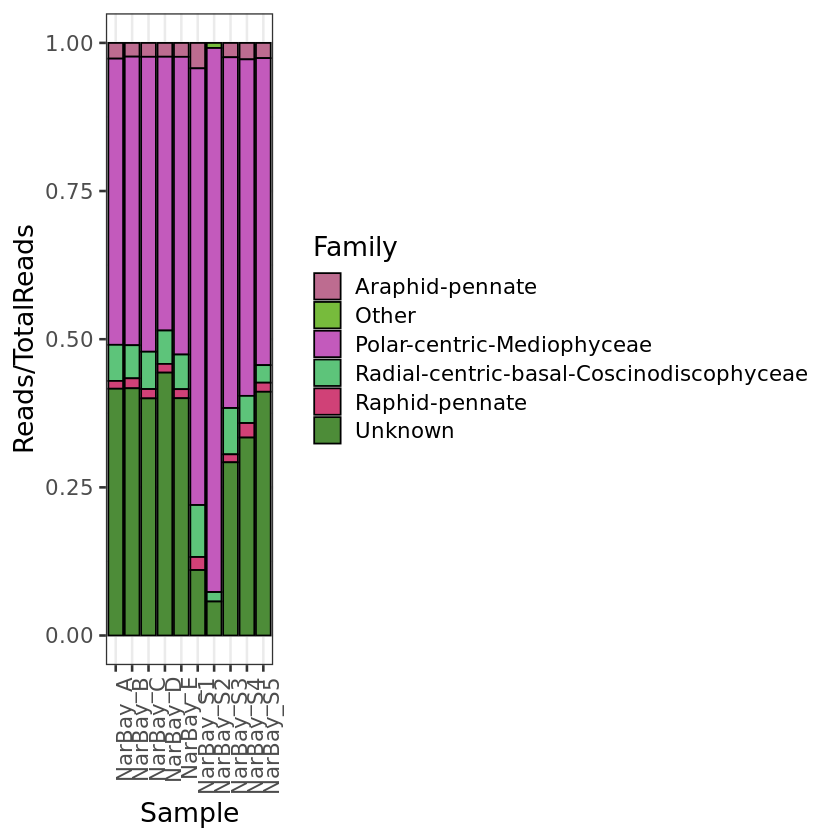

In [196]:
per_sample_reads = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))

ochro_species = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Genus,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        #dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
        #                                         TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

distinct_cols=c("#bd6c90",
"#77bb3c",
"#c35abc",
"#5dc47a",
"#d04177",
"#4d8c38",
"#7977c2",
"#a6ad5d",
"#5a9dd6",
"#ca4d3f",
"#4ec2b9",
"#ce814a",
"#3c8963","gray",
"#786d29","black")
ggplot(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Family,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 500000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))) + 
    geom_bar(aes(x=Sample,y=Reads/TotalReads,fill=Family),stat="identity",color="black") + 
    scale_fill_manual(values=distinct_cols) + 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

In [205]:
per_sample_reads = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))
ochro_species = EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Genus,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(per_sample_reads) %>%
        #dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
        #                                         TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads))

`summarise()` has
grouped output by
'Genus'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Genus',
'TotalReads'. You
can override using
the `.groups`
argument.


In [206]:
head(ochro_species)

Genus,TotalReads,Sample,Reads
<chr>,<dbl>,<chr>,<dbl>
Amphiprora,12791169,NarBay_B,28432.33
Amphiprora,13336446,NarBay_C,18058.66
Amphiprora,14193086,NarBay_E,18943.62
Amphiprora,18609005,NarBay_S4,40451.67
Amphiprora,20979455,NarBay_A,50681.23
Amphiprora,24094620,NarBay_S2,12902.50


`summarise()` has
grouped output by
'Genus'. You can
override using the
`.groups`
argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Genus',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Genus'. You can
override using the
`.groups`
argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Genus',
'TotalReads'. You
can override using
the `.groups`
argument.


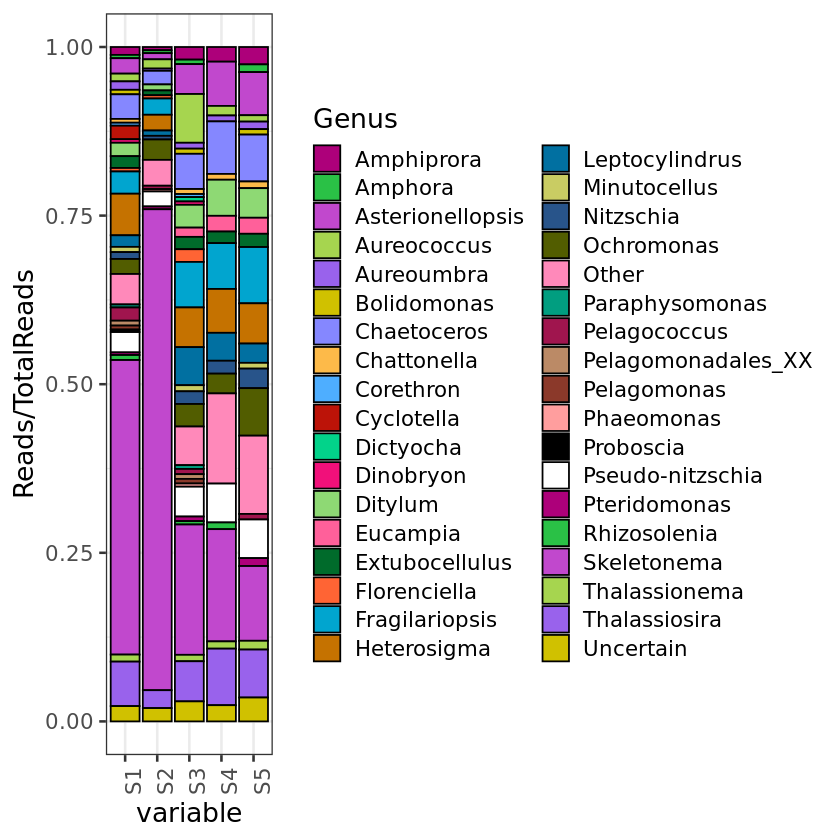

In [207]:
# diatoms appear much more diverse and reads much more abundant using direct mapping
# approach; EUKulele is conservative when annotating at species level.
per_sample_reads = harriet_diatom_out %>%
        dplyr::group_by(variable) %>% dplyr::summarize(TotalReads=sum(value))

ochro_species_harriet = harriet_diatom_out %>%
        dplyr::group_by(Genus,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(per_sample_reads) %>%
        #dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
        #                                         TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads))

ggplot(harriet_diatom_out %>%
        dplyr::group_by(Genus,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Genus = dplyr::case_when(Reads < 500000 ~ "Other",
                                                 TRUE ~ Genus)) %>%
    dplyr::group_by(Genus,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads))) + 
    geom_bar(aes(x=variable,y=Reads/TotalReads,fill=Genus),stat="identity",color="black") + 
    scale_fill_manual(values=c(distinct_cols,distinct_cols,distinct_cols)) + 
    theme_bw(base_size=16)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) 

`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups`
argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.


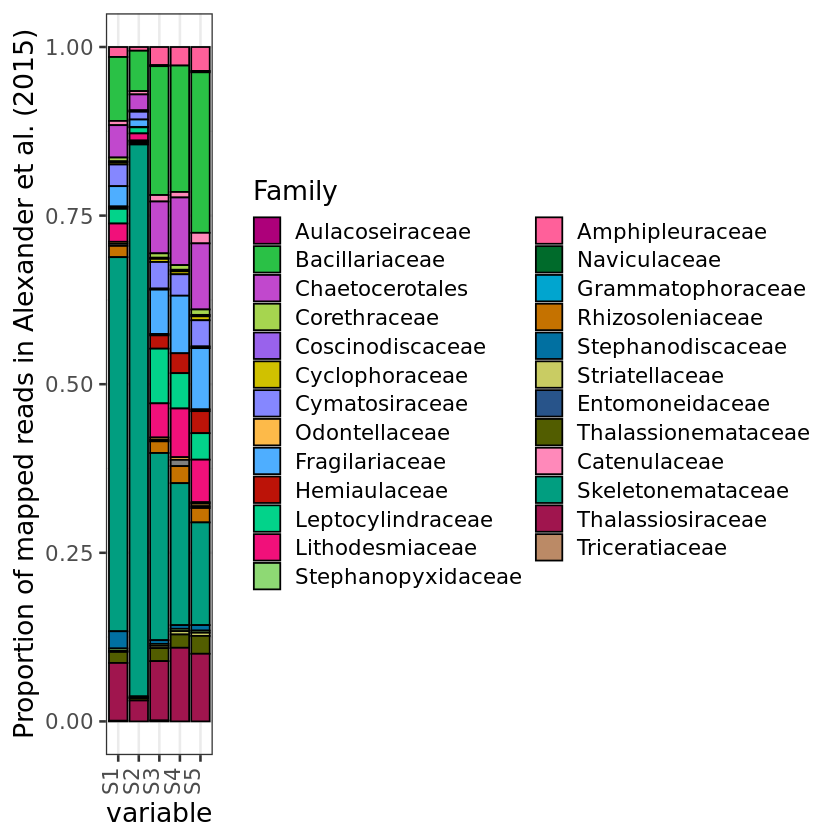

In [76]:
per_sample_reads = harriet_nb_grouped %>%
        dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(variable) %>% dplyr::summarize(TotalReads=sum(value))

distinct_cols=c("#ad007a",
"#2ac146",
"#c148cd",
"#a6d54f",
"#9962ec",
"#d0c100",
"#8587ff",
"#fdba49",
"#4eaeff",
"#bc1308",
"#02d38a",
"#f1107a",
"#8ed974",
"#ff609a",
"#006b2b",
"#ff6434",
"#01a5cf",
"#c57200",
"#0170a1",
"#c9cc63",
"#28548a",
"#525d00",
"#ff89ba",
"#019e80",
"#a0154e",
"#bb8a66",
"#8b392a",
"#ff9e9e","black","white")
all_families = unique(c((harriet_nb_grouped %>% dplyr::filter(Class == "Bacillariophyta"))$Family,
                        (EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta"))$Family))
harriet_families_diatom = ggplot(harriet_nb_grouped %>%
        dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Family,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(per_sample_reads) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 100000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads))) + 
    geom_bar(aes(x=variable,y=Reads/TotalReads,fill=Family),stat="identity",color="black") + 
    scale_fill_manual(values=c(distinct_cols),breaks=all_families) + 
    theme_bw(base_size=16)+ ylab("Proportion of mapped reads in Alexander et al. (2015)") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0, hjust=1)) 
harriet_families_diatom

`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups`
argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups`
argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.


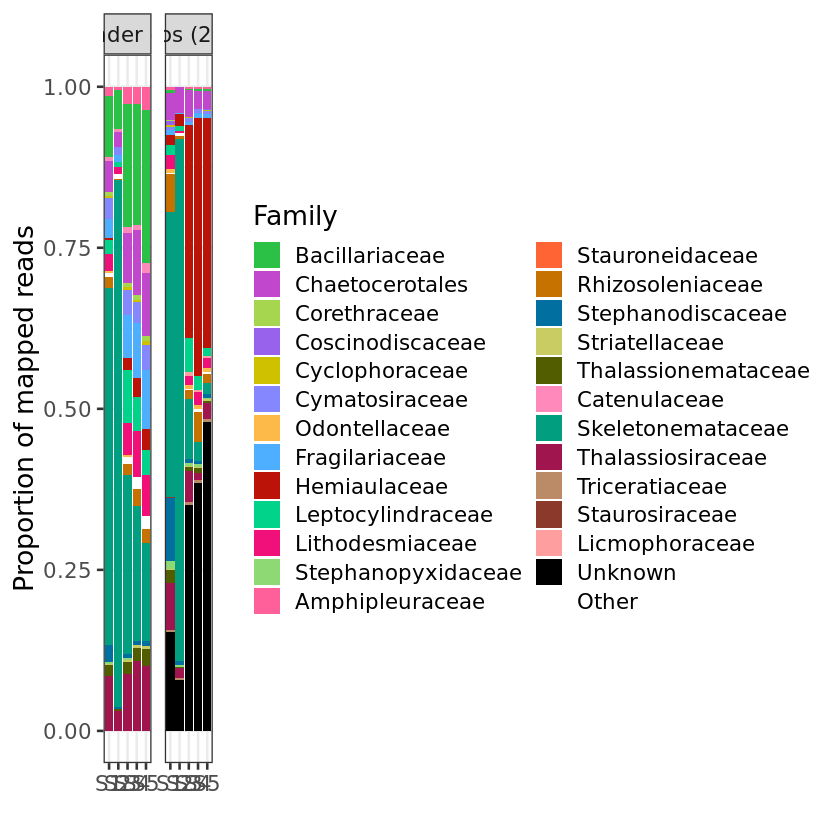

In [246]:
distinct_cols=c("#ad007a",
"#2ac146",
"#c148cd",
"#a6d54f",
"#9962ec",
"#d0c100",
"#8587ff",
"#fdba49",
"#4eaeff",
"#bc1308",
"#02d38a",
"#f1107a",
"#8ed974",
"#ff609a",
"#006b2b",
"#ff6434",
"#01a5cf",
"#c57200",
"#0170a1",
"#c9cc63",
"#28548a",
"#525d00",
"#ff89ba",
"#019e80",
"#a0154e",
"#bb8a66",
"#8b392a",
"#ff9e9e","black","white")
all_families = unique(c((harriet_nb_grouped %>% dplyr::filter(Class == "Bacillariophyta"))$Family,
                        (EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta"))$Family))
all_families = c(setdiff(all_families,c("Unknown")),"Unknown","Other")

stacked_family_comparison = ggplot((harriet_nb_grouped %>%
        dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Family,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(harriet_nb_grouped %>%
        dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(variable) %>% dplyr::summarize(TotalReads=sum(value))) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 200000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads)) %>%
    dplyr::mutate(Source="Alexander (2015)",
                  Sample=paste0("NarBay_",variable)))%>%
    dplyr::bind_rows(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::filter(grepl("S",Sample)) %>%
        dplyr::group_by(Family,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 20000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads)) %>%
    dplyr::mutate(Source="Krinos (2022)"))%>% 
    dplyr::mutate(variable=vapply(strsplit(Sample, "_", fixed = TRUE), "[", "", 2))) + 
    geom_bar(aes(x=variable,y=Reads/TotalReads,fill=Family),stat="identity") + 
    scale_fill_manual(values=c(distinct_cols),breaks=all_families) + 
    theme_bw(base_size=16)+ ylab("Proportion of mapped reads") + xlab("")+
    facet_wrap(~Source,ncol=2)

stacked_family_comparison

`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups` argument.
Joining, by =
"variable"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.
`summarise()` has
grouped output by
'Family'. You can
override using the
`.groups` argument.
Joining, by =
"Sample"
`summarise()` has
grouped output by
'Family',
'TotalReads'. You
can override using
the `.groups`
argument.
Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 56 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


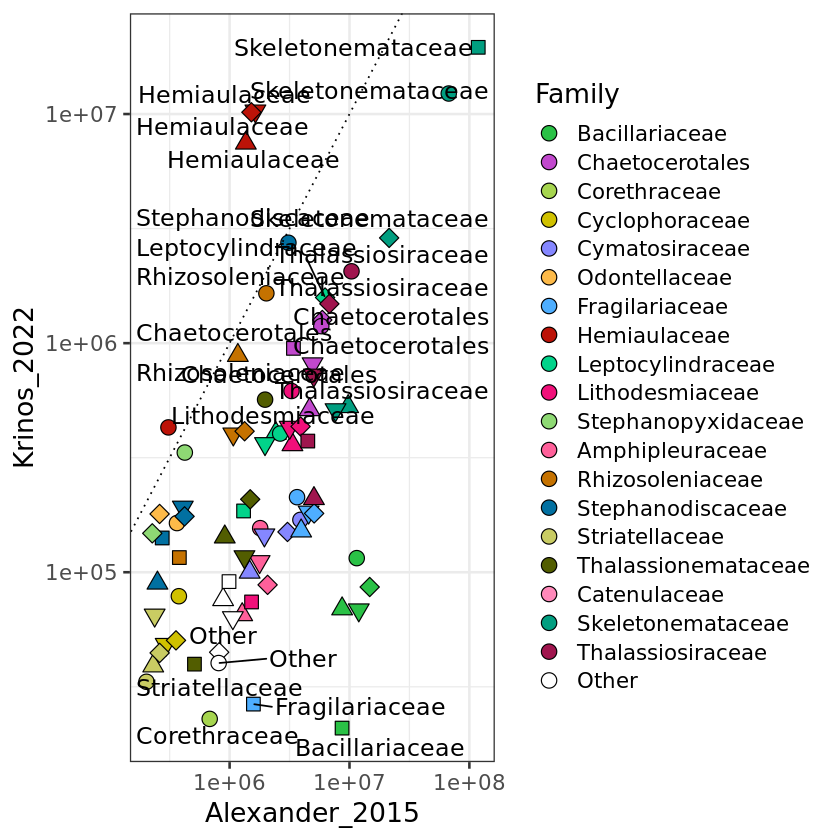

In [274]:
family_diatom_scatter = ggplot((harriet_nb_grouped %>%
        dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Family,variable) %>% dplyr::summarize(Reads=sum(value)) %>%
        dplyr::left_join(harriet_nb_grouped %>%
        dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(variable) %>% dplyr::summarize(TotalReads=sum(value))) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 200000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,variable) %>% dplyr::summarize(Reads=sum(Reads)) %>%
    dplyr::mutate(Sample=paste0("NarBay_",variable)) %>%
    dplyr::rename(c("Alexander_2015"="Reads")))%>%
    dplyr::left_join(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::filter(grepl("S",Sample)) %>%
        dplyr::group_by(Family,Sample) %>% dplyr::summarize(Reads=sum(NumReadssum)) %>%
        dplyr::left_join(EUKulele_all %>% dplyr::filter(Class == "Bacillariophyta") %>%
        dplyr::group_by(Sample) %>% dplyr::summarize(TotalReads=sum(NumReadssum))) %>%
        dplyr::mutate(Family = dplyr::case_when(Reads < 20000 ~ "Other",
                                                 TRUE ~ Family)) %>%
    dplyr::group_by(Family,TotalReads,Sample) %>% dplyr::summarize(Reads=sum(Reads)) %>%
    dplyr::rename(c("Krinos_2022"="Reads")), by = c("Sample","Family"))%>% 
    dplyr::mutate(variable=vapply(strsplit(Sample, "_", fixed = TRUE), "[", "", 2)) %>%
    replace_na(list("Alexander_2015"=0,"Krinos (2022)"=0))) + 
    geom_point(aes(x = Alexander_2015, y = Krinos_2022,fill=Family,shape=Sample),size=4) +
    geom_abline(aes(intercept=0,slope=1),linetype="dotted") + 
    scale_shape_manual(values=c(21,22,23,24,25)) + theme_bw(base_size=16) +
    geom_text_repel(aes(x=Alexander_2015,y=Krinos_2022,label=Family),size=5) +
    guides(fill = guide_legend(override.aes = list(pch=21)))+guides(shape="none")+
    scale_x_log10() + scale_y_log10()+ 
    scale_fill_manual(values=c(distinct_cols),breaks=all_families) 
family_diatom_scatter

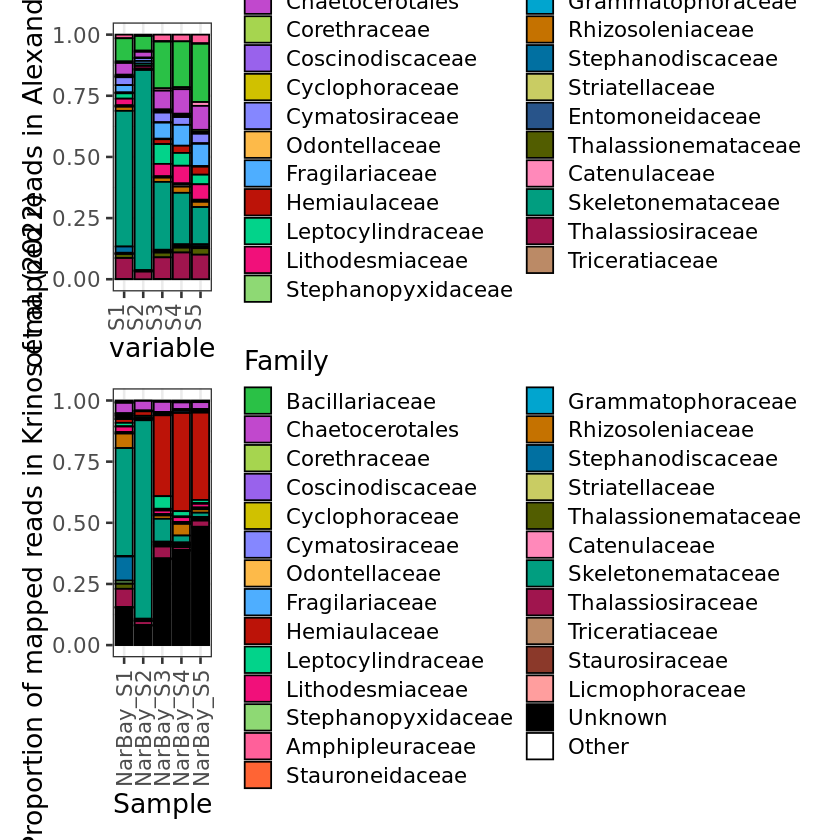

In [78]:
(harriet_families_diatom / EUKulele_families_diatom) +
  plot_layout(guides = 'collect')

Warning message:
“Removed 145 rows containing missing values (geom_point).”
Warning message:
“Removed 145 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


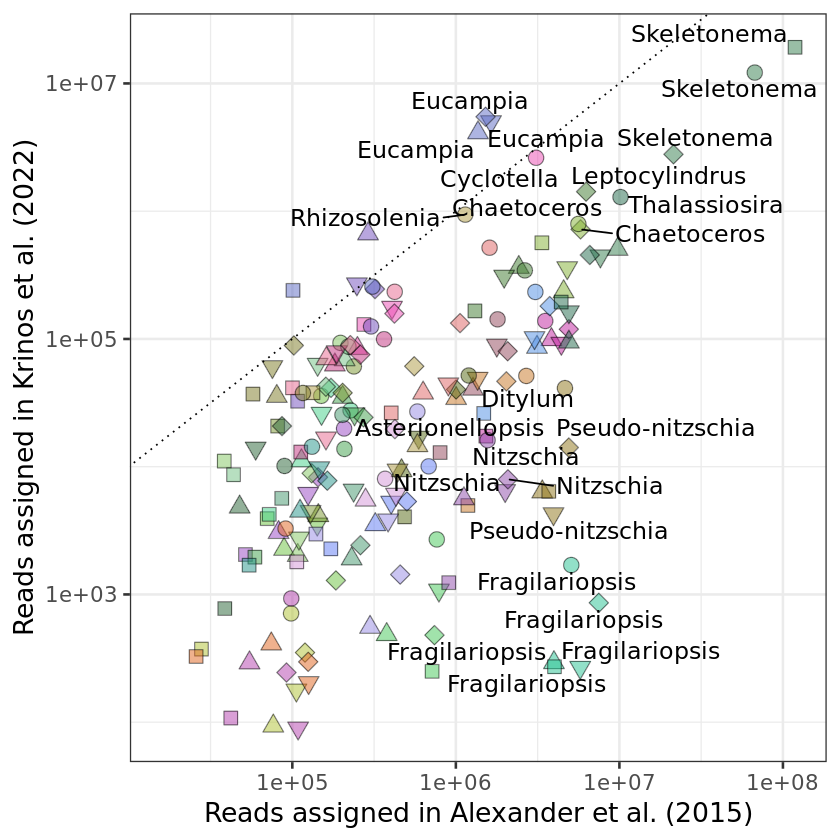

In [208]:
many_fills=c("#91475a",
"#44c758",
"#bf209e",
"#6ac13e",
"#9746c3",
"#afc133",
"#956bed",
"#459521",
"#d273e7",
"#82b033",
"#3c4dbb",
"#c8b132",
"#3561d3",
"#e99f2f",
"#5f7af3",
"#82c660",
"#b440ad",
"#43d087",
"#e94ab1",
"#3e9f4a",
"#724fbe",
"#7b962f",
"#6257b8",
"#b1861e",
"#4f8de3",
"#df651e",
"#5d6bc3",
"#c87625",
"#3464ab",
"#e35437",
"#26c191",
"#e73379",
"#71bf82",
"#bf3892",
"#3e7a2f",
"#b27de3",
"#556912",
"#8d4aaa",
"#95bb6e",
"#c2307f",
"#61c3a6",
"#de3953",
"#3fc6d1",
"#b42b24",
"#59ade0",
"#a94c1d",
"#968ae4",
"#8d7519",
"#6b4fa0",
"#c5bb69",
"#505099",
"#ae9943",
"#a24fa2",
"#347f4e",
"#e573c3",
"#296437",
"#e8668d",
"#43956d",
"#ba3866",
"#24938a",
"#de6363",
"#226a4d",
"#d393d8",
"#7d7a24",
"#784389",
"#6a823d",
"#936fb7",
"#5b5b10",
"#a4a1e2",
"#936920",
"#4584b9",
"#e8814e",
"#5d679c",
"#dda25a",
"#6f61a1",
"#959f5b",
"#a4467f",
"#476025",
"#e893b9",
"#525620",
"#b36ea0",
"#705d18",
"#864e78",
"#7e8149",
"#a4384a",
"#646831",
"#c1697a",
"#907c40",
"#e78e8c",
"#765113",
"#f29271",
"#7a4523",
"#dca87c",
"#914025",
"#b47f4d",
"#ac574b",
"#826235",
"#cb6a4e",
"#9c5f20",
"#965d39")
compare_diatom_genus = ggplot(ochro_species_harriet %>%
                              dplyr::mutate(Sample=paste0("NarBay_",variable)) %>%
                              dplyr::left_join(ochro_species %>%
                                          dplyr::rename("Reads_Krinos"="Reads",
                                                        "TotalReads_Krinos"="TotalReads"),
                                          by = c("Genus","Sample")) %>%
       dplyr::filter((Reads_Krinos > 10000) | (Reads > 10000)) %>%
       dplyr::mutate(label=dplyr::case_when((Reads > 1000000) | (Reads_Krinos > 1000000) ~ Genus,
                     TRUE ~ ""))) + theme_bw(base_size=16) + 
    geom_point(aes(x = Reads, y = Reads_Krinos,fill=Genus,shape=Sample),size=4,alpha=0.5) +
    geom_abline(aes(slope=1,intercept=0),linetype="dotted") + scale_shape_manual(values=c(21,22,23,24,25)) + 
    scale_y_log10() + scale_x_log10() + geom_text_repel(aes(x=Reads,y=Reads_Krinos,label=label),size=5) +
    theme(legend.position="none")+
    scale_fill_manual(values=many_fills) + xlab("Reads assigned in Alexander et al. (2015)") + 
    ylab("Reads assigned in Krinos et al. (2022)")

compare_diatom_genus

Warning message:
“Removed 145 rows containing missing values (geom_point).”
Warning message:
“Removed 145 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


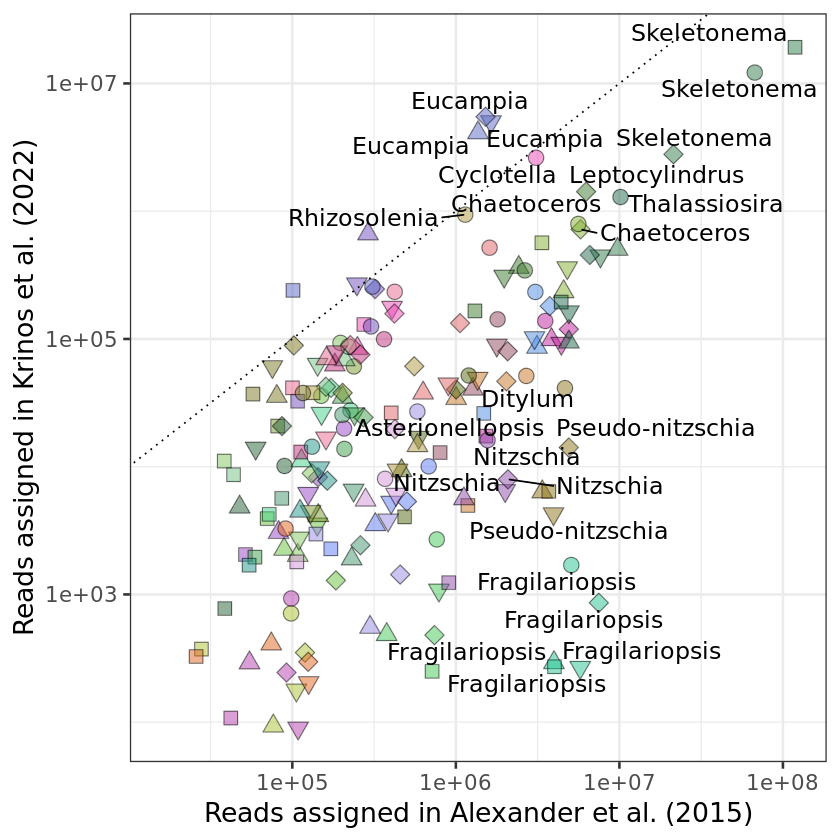

In [209]:
many_fills=c("#91475a",
"#44c758",
"#bf209e",
"#6ac13e",
"#9746c3",
"#afc133",
"#956bed",
"#459521",
"#d273e7",
"#82b033",
"#3c4dbb",
"#c8b132",
"#3561d3",
"#e99f2f",
"#5f7af3",
"#82c660",
"#b440ad",
"#43d087",
"#e94ab1",
"#3e9f4a",
"#724fbe",
"#7b962f",
"#6257b8",
"#b1861e",
"#4f8de3",
"#df651e",
"#5d6bc3",
"#c87625",
"#3464ab",
"#e35437",
"#26c191",
"#e73379",
"#71bf82",
"#bf3892",
"#3e7a2f",
"#b27de3",
"#556912",
"#8d4aaa",
"#95bb6e",
"#c2307f",
"#61c3a6",
"#de3953",
"#3fc6d1",
"#b42b24",
"#59ade0",
"#a94c1d",
"#968ae4",
"#8d7519",
"#6b4fa0",
"#c5bb69",
"#505099",
"#ae9943",
"#a24fa2",
"#347f4e",
"#e573c3",
"#296437",
"#e8668d",
"#43956d",
"#ba3866",
"#24938a",
"#de6363",
"#226a4d",
"#d393d8",
"#7d7a24",
"#784389",
"#6a823d",
"#936fb7",
"#5b5b10",
"#a4a1e2",
"#936920",
"#4584b9",
"#e8814e",
"#5d679c",
"#dda25a",
"#6f61a1",
"#959f5b",
"#a4467f",
"#476025",
"#e893b9",
"#525620",
"#b36ea0",
"#705d18",
"#864e78",
"#7e8149",
"#a4384a",
"#646831",
"#c1697a",
"#907c40",
"#e78e8c",
"#765113",
"#f29271",
"#7a4523",
"#dca87c",
"#914025",
"#b47f4d",
"#ac574b",
"#826235",
"#cb6a4e",
"#9c5f20",
"#965d39")
compare_diatom_genus = ggplot(ochro_species_harriet %>% 
                              dplyr::mutate(Sample=paste0("NarBay_",variable)) %>%
                              dplyr::left_join(ochro_species %>%
                                          dplyr::rename("Reads_Krinos"="Reads",
                                                        "TotalReads_Krinos"="TotalReads"),
                                          by = c("Genus","Sample")) %>%
       dplyr::filter((Reads_Krinos > 10000) | (Reads > 10000)) %>%
       dplyr::mutate(label=dplyr::case_when((Reads > 1000000) | (Reads_Krinos > 1000000) ~ Genus,
                     TRUE ~ ""))) + theme_bw(base_size=16) + 
    geom_point(aes(x = Reads, y = Reads_Krinos,fill=Genus,shape=Sample),size=4,alpha=0.5) +
    geom_abline(aes(slope=1,intercept=0),linetype="dotted") + scale_shape_manual(values=c(21,22,23,24,25)) + 
    scale_y_log10() + scale_x_log10() + geom_text_repel(aes(x=Reads,y=Reads_Krinos,label=label),size=5) +
    theme(legend.position="none")+
    scale_fill_manual(values=many_fills) + xlab("Reads assigned in Alexander et al. (2015)") + 
    ylab("Reads assigned in Krinos et al. (2022)")

compare_diatom_genus

In [21]:
eukulele_grouped_out_bind = eukulele_grouped_out %>% 
    dplyr::mutate(variable=vapply(strsplit(Sample, "_", fixed = TRUE), "[", "", 2)) %>%
    dplyr::rename(c("value"="NumReadssum"))


In [22]:
eukulele_grouped_out_bind

V1,ClassificationPlotRed,Sample,value,numerictime,total,Proportion,variable
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,Archaea,NarBay_S1,5143139.3,1,228926446,0.022466340,S1
1,Archaea,NarBay_S2,2631354.8,2,162919659,0.016151241,S2
2,Archaea,NarBay_S3,2941190.0,3,276606872,0.010633105,S3
3,Archaea,NarBay_S4,1521226.6,4,133562215,0.011389648,S4
4,Archaea,NarBay_S5,1550632.2,5,170637456,0.009087291,S5
5,Bacillariophyta-Stramenopiles,NarBay_S1,51899191.4,1,228926446,0.226706841,S1
6,Bacillariophyta-Stramenopiles,NarBay_S2,15556098.0,2,162919659,0.095483247,S2
7,Bacillariophyta-Stramenopiles,NarBay_S3,104664873.8,3,276606872,0.378388552,S3
8,Bacillariophyta-Stramenopiles,NarBay_S4,68777042.3,4,133562215,0.514943856,S4


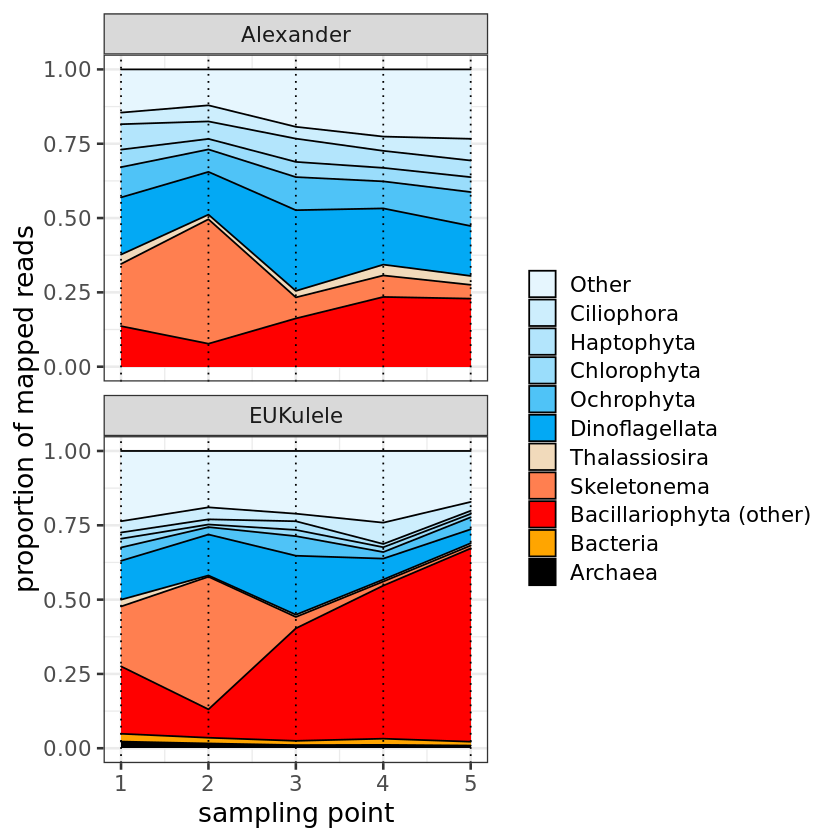

In [23]:
stacked_alexander = ggplot(harriet_grouped_out %>% dplyr::mutate(Source="Alexander") %>% 
    dplyr::bind_rows(eukulele_grouped_out_bind %>% dplyr::mutate(Source="EUKulele")))+ 
     geom_area(aes(x=numerictime,y=Proportion,fill=factor(ClassificationPlotRed,
                                                         levels=c("Other",
                                                     "Ciliophora","Haptophyta",
                                                    "Chlorophyta","Ochrophyta",
                                                    "Dinoflagellata","Thalassiosira","Skeletonema",
                                                    "Bacillariophyta-Stramenopiles","Bacteria","Archaea"))),
                       color="black")+ 
    theme_bw() + xlab("sampling point") + ylab("proportion of mapped reads") + 
    geom_vline(aes(xintercept=numerictime),linetype="dotted") + 
    scale_fill_manual(name="",
                               values = c("#e6f6fe","#cdeefd","#b3e5fc","#9addfb",
                                         "#4fc3f7","#03a9f4","#F1DABB","#FF7F50","red","orange","black"),
                     breaks=c("Other",
                                                     "Ciliophora","Haptophyta",
                                                    "Chlorophyta","Ochrophyta",
                                                    "Dinoflagellata","Thalassiosira","Skeletonema",
                                                    "Bacillariophyta-Stramenopiles","Bacteria","Archaea"),
                     labels=c("Other",
                                                     "Ciliophora","Haptophyta",
                                                    "Chlorophyta","Ochrophyta",
                                                    "Dinoflagellata","Thalassiosira","Skeletonema",
                                                    "Bacillariophyta (other)","Bacteria","Archaea"))+ 
    facet_wrap(~Source,nrow=2) + theme_bw(base_size=16)
stacked_alexander

In [ ]:
ggsave(plot=stacked_alexander,filename=file.path("..","figures","alexanderstackedcompare.png"),
       width=10,height=12,units="in")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 140 rows containing missing values (geom_point).”
Warning message:
“Removed 140 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 61 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


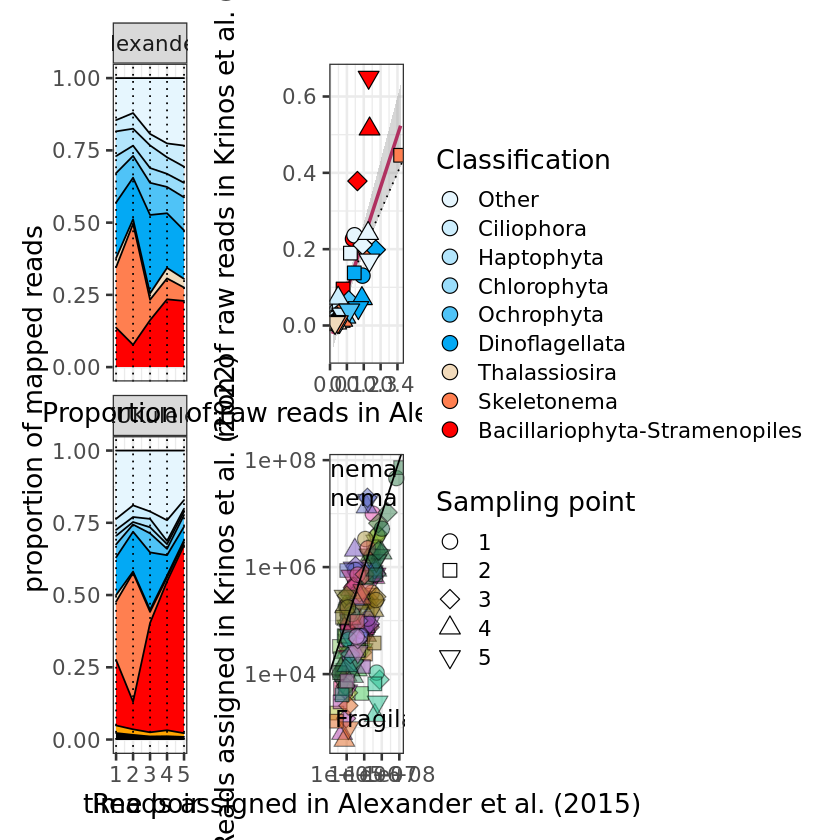

In [188]:
(stacked_alexander + theme(legend.position="none"))| (compare_scatter_alexander / compare_diatom_genus)+
  plot_layout(guides = 'collect') & plot_annotation(tag_levels = 'A')

In [195]:
combo_plot = (stacked_alexander + theme(legend.position="none")) | (compare_scatter_alexander / compare_diatom_genus / ko_occurrences) + 
  plot_layout(guides = 'collect') + plot_annotation(tag_levels = 'A')
ggsave(filename="new_combo_plot.png",dpi=400,height=16,width=18,units="in",plot=combo_plot)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 140 rows containing missing values (geom_point).”
Warning message:
“Removed 140 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 28034 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 47 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 145 rows containing missing values (geom_point).”
Warning message:
“Removed 145 rows containing missing values (geom_text_repel).”
ERROR while rich displaying an object: Error in grid.Call(C_convert, x, as.integer(whatfrom), as.integer(whatto), : Viewport has zero dimension(s)

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")


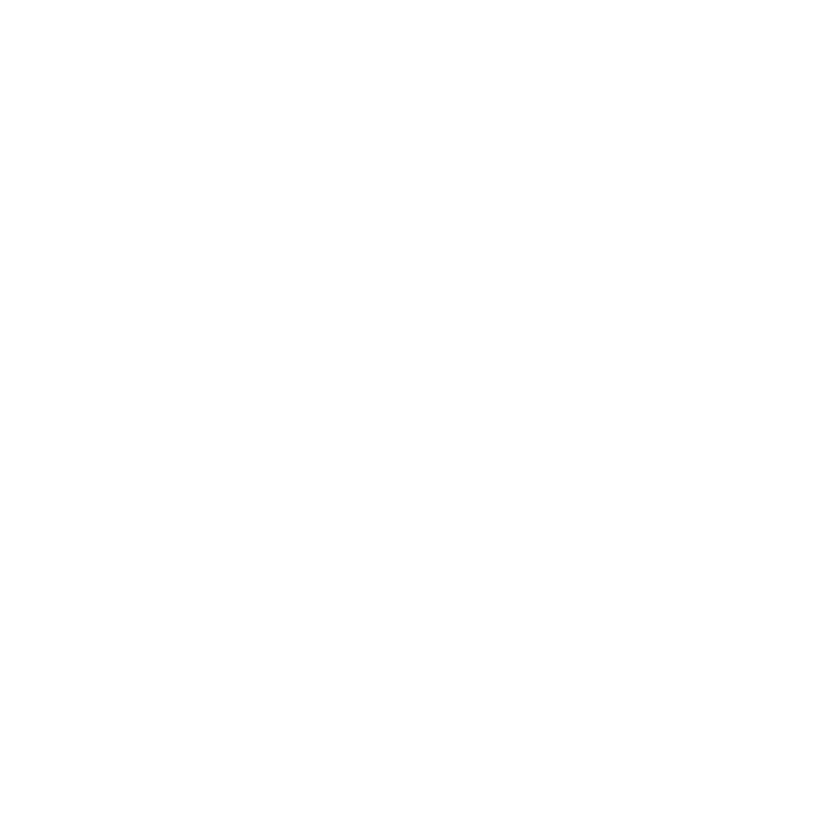

In [194]:
((compare_scatter_alexander / compare_diatom_genus ) | (stacked_family_comparison + 
                                                       theme(legend.position="none"))) | skeletonema_compare+ 
  plot_layout(guides = 'collect') & plot_annotation(tag_levels = 'A')

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 145 rows containing missing values (geom_point).”
Warning message:
“Removed 145 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 55 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


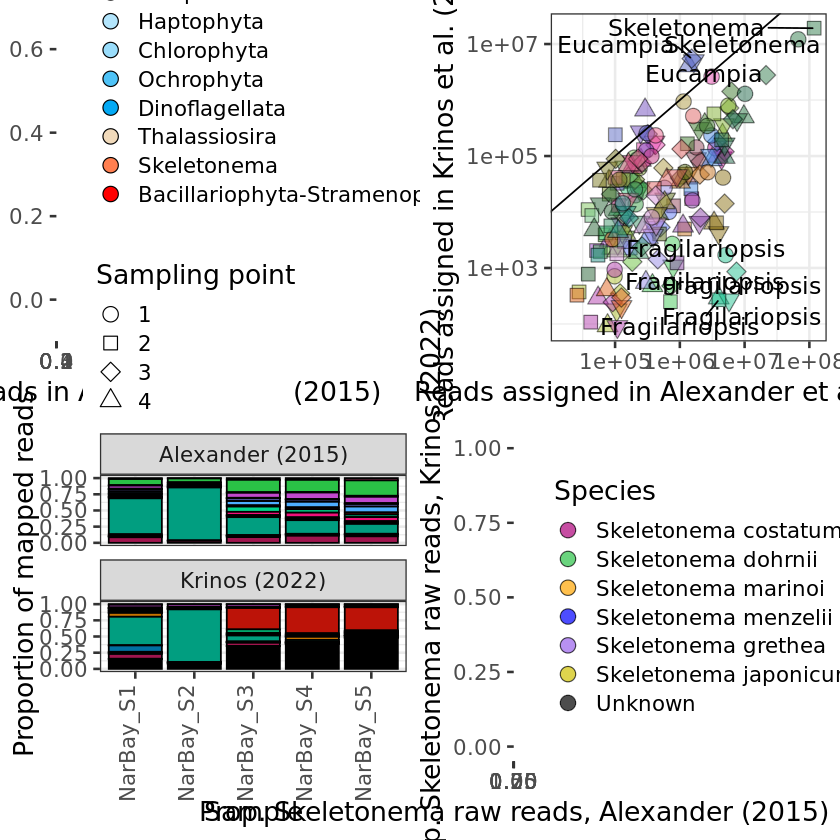

In [195]:
cowplot::plot_grid(compare_scatter_alexander,compare_diatom_genus,
                   stacked_family_comparison + theme(legend.position="none"),
                   skeletonema_compare)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 11 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 71 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


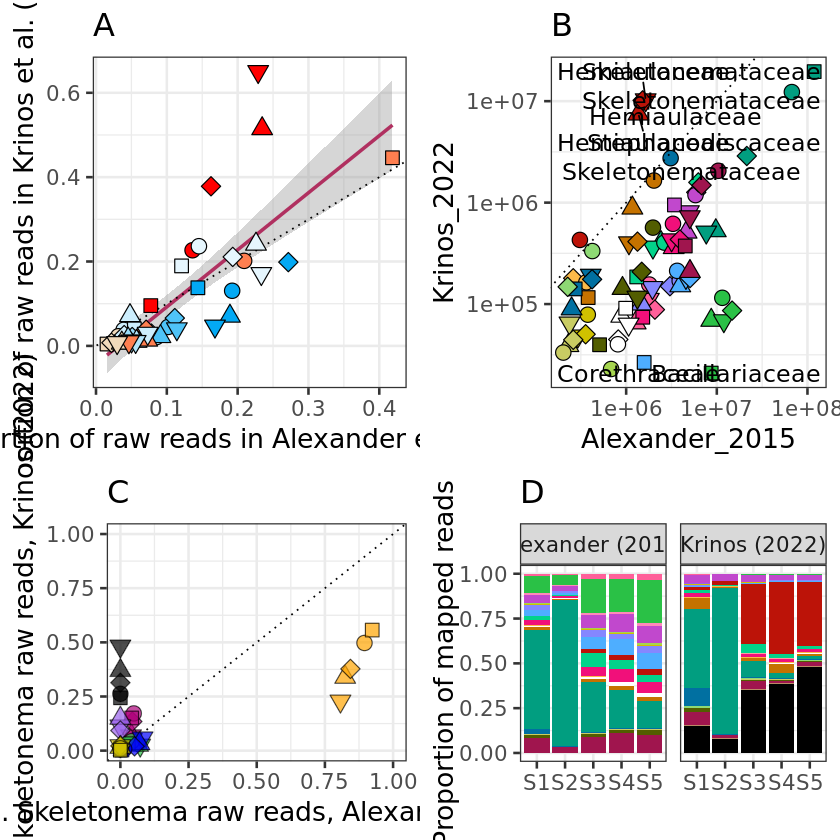

In [275]:
combo_plot_1 = cowplot::plot_grid(cowplot::plot_grid(compare_scatter_alexander+theme(legend.position="none")+
                                                     ggtitle("A"),
                   family_diatom_scatter+theme(legend.position="none")+ggtitle("B"),nrow=1),
                   plot_grid(skeletonema_compare+theme(legend.position="none")+ggtitle("C"),
                       stacked_family_comparison + theme(legend.position="none")+ggtitle("D"),
                             ncol=2),nrow=2,rel_heights=c(1,0.8))
combo_plot_1

In [276]:
gridded_together = cowplot::plot_grid(combo_plot_1,
        cowplot::plot_grid(cowplot::get_legend(compare_scatter_alexander),
                   cowplot::get_legend(skeletonema_compare),
                   cowplot::get_legend(stacked_family_comparison),ncol=1),ncol=2,rel_widths=c(1,0.25))
ggsave("gridded_together.pdf",plot=gridded_together,width=15,height=10,units="in")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“ggrepel: 54 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [229]:
?ggsave